In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./pitchers_salary_current&predict_fin.csv')

In [3]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      604 non-null    int64  
 1   선수명     604 non-null    object 
 2   팀명      604 non-null    object 
 3   ERA     604 non-null    float64
 4   G       604 non-null    int64  
 5   W       604 non-null    int64  
 6   L       604 non-null    int64  
 7   SV      604 non-null    int64  
 8   HLD     604 non-null    int64  
 9   WPCT    604 non-null    float64
 10  IP      604 non-null    float64
 11  H       604 non-null    float64
 12  HR      604 non-null    int64  
 13  BB      604 non-null    int64  
 14  HBP     604 non-null    int64  
 15  SO      604 non-null    int64  
 16  R       604 non-null    int64  
 17  ER      604 non-null    int64  
 18  WHIP    604 non-null    float64
 19  CG      604 non-null    int64  
 20  SHO     604 non-null    int64  
 21  QS      604 non-null    int64  
 22  BS

In [6]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,...,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,12.625828,4.484768,33.842715,3.668874,3.556291,1.928808,4.066225,0.470608,63.375828,22.406788,...,0.925497,2.923841,2.258278,0.978477,2.889073,0.220199,2021.488411,18414.635762,1.149553,20505.132450
std,6.560781,1.662362,18.368445,3.693878,3.022603,6.241935,6.415331,0.296443,46.262638,39.203281,...,1.137078,2.372625,1.929826,1.289529,2.840003,0.514650,1.129228,40334.635286,1.644124,28086.415096
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,2700.000000
25%,7.000000,3.337500,21.000000,1.000000,1.000000,0.000000,0.000000,0.273000,31.000000,0.300000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2020.000000,4000.000000,0.017500,5600.000000
50%,12.000000,4.260000,29.500000,3.000000,3.000000,0.000000,1.000000,0.500000,50.500000,0.600000,...,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2021.000000,8750.000000,0.550000,10500.000000
75%,18.000000,5.370000,48.000000,5.000000,5.000000,0.000000,6.000000,0.667000,79.000000,36.000000,...,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,2023.000000,18025.000000,1.757500,20000.000000
max,25.000000,12.560000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [77]:
df['BB'].describe()

count    444.000000
mean      30.707207
std       15.757039
min        6.000000
25%       19.000000
50%       26.000000
75%       39.000000
max       93.000000
Name: BB, dtype: float64

In [4]:
df = df.query('IP > 31')

In [8]:
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [20]:
df['IP/G'] = df['IP'] / df['G']

In [27]:
df['SO/IP'] = df['SO'] / df['IP']

In [35]:
df['K/BB'] = df['SO'] / df['BB']

In [53]:
df['QS/G'] = df['QS'] / df['G']
df['SV/G'] = df['SV'] / df['G']

In [95]:
df['1/ER'] = 10/df['ER']
df['1/ERA'] = 10/df['ERA']
df['1/H'] = 10/df['H']
df['1/HR'] = 10/df['HR']
df['1/HBP'] = 10/df['HBP']
df['1-AVG'] = 1 - df['AVG']
df['1-WHIP'] = 1- df['WHIP']

In [74]:
df['M-ER']

0      77
3      48
4      32
5      78
6      71
       ..
599    16
600    39
601    64
602    70
603    45
Name: M-ER, Length: 444, dtype: int64

In [76]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,WAR_x,예측연봉,IP/G,SO/IP,K/BB,K/9,QS/G,SV/G,M-BB,M-ER
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,11.518018,4.164955,39.529279,4.671171,4.418919,2.551802,4.993243,0.497644,79.328829,27.680180,...,1.548896,25306.756757,2.647836,0.801671,2.175684,7.102603,0.153378,0.045196,62.292793,64.689189
std,6.067873,1.325098,17.290808,3.792588,3.050397,7.160496,7.128770,0.240821,43.913520,44.048086,...,1.745014,30978.441259,2.006384,0.191824,0.973959,4.392763,0.231618,0.122696,15.757039,18.897556
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,-1.060000,3000.000000,0.515625,0.361702,0.580645,1.555556,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.260000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,0.287500,8150.000000,0.978361,0.672481,1.497093,4.000000,0.000000,0.000000,54.000000,50.000000
50%,11.000000,3.990000,36.500000,4.000000,4.000000,0.000000,1.000000,0.500000,61.500000,0.600000,...,0.990000,14250.000000,1.378354,0.791310,1.935133,5.666667,0.000000,0.000000,67.000000,71.000000
75%,16.000000,5.020000,54.250000,6.000000,6.000000,1.000000,8.000000,0.640750,107.000000,51.000000,...,2.352500,26125.000000,4.857500,0.921211,2.684586,8.888889,0.285714,0.018519,74.000000,79.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,8.450000,200000.000000,6.565217,1.395349,6.782609,25.000000,0.846154,0.688525,87.000000,93.000000


In [54]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'IP/G', 'SO/IP', 'K/BB', 'K/9', 'QS/G',
       'SV/G'],
      dtype='object')

In [83]:
df_corr = df[['M-ERA', 'G', 'W', 'K/BB', 'WHIP','SO/IP', 'SO', 'IP/G', 'QS/G', 'M-ER','현재연봉', 'WAR_x', '예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from curr

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

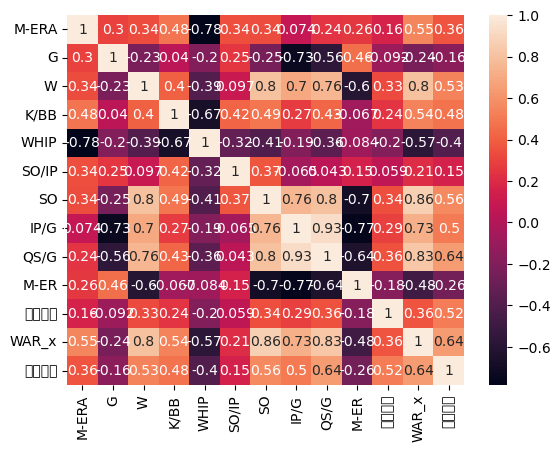

In [84]:
sns.heatmap(df_corr, annot = True)

In [58]:
X = df[['QS/G','ERA', 'IP/G', 'SO/IP','W', 'K/BB', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'K/9', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK',
       '현재연봉', 'WAR_x']].to_numpy()
y = df['예측연봉'].to_numpy()

In [59]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터로 분리하기

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(X_train)
y_scaled = ss_y.fit_transform(y_train)
scaled_X = ss_x.transform(X_test)
scaled_y = ss_y.transform(y_test)

In [60]:
lr = linear_model.LinearRegression()
model = lr.fit(X_scaled, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_scaled, y_train)) # train R2 score를 출력
print(model.score(scaled_X, y_test))

0.7472125798310405
-3.059674015193176


In [61]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     28.75
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           9.99e-77
Time:                        09:51:08   Log-Likelihood:                -3945.5
No. Observations:                 355   AIC:                             7959.
Df Residuals:                     321   BIC:                             8091.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.916e+04   2.71e+04      2.187      0.029    5936.010    1.12e+05
x1          1.697e+05    2.9e+04      5.849      0.000    1.13e+05    2.27e+05
x2          3084.8364   2410.401      1.280      0.202   -1657.342    7827.015
x3         -5944.2070   2306.113     -2.578      0.010   -1.05e+04   -1407.203
x4         -4.824e+04   1.47e+04     -3.282      0.001   -7.72e+04   -1.93e+04
x5          -298.8130    641.832     -0.466      0.642   -1561.541     963.915
x6          2677.3727   2369.561      1.130      0.259   -1984.458    7339.203
x7           383.6797    209.916      1.828      0.069     -29.306     796.665
x8           -10.5617    234.779     -0.045      0.964    -472.461     451.337
x9         -1210.9683   5542.454     -0.218      0.827   -1.21e+04    9693.155
x10         -276.1197    713.559     -0.387      0.699   -1679.963    1127.723
x11          722.6789    261.924      2.759      0.006     207.375    1237.983
x12          797.0332    284.714      2.799      0.005     236.893    1357.173
x13           67.2040     20.797      3.231      0.001      26.288     108.120
x14          857.6313    365.962      2.343      0.020     137.643    1577.619
x15          604.8361    187.177      3.231      0.001     236.588     973.084
x16          364.9395    432.641      0.844      0.400    -486.231    1216.110
x17        -1105.4904    465.071     -2.377      0.018   -2020.463    -190.517
x18         2.965e+04   1.66e+04      1.782      0.076   -3084.254    6.24e+04
x19        -1.067e+04   6916.621     -1.543      0.124   -2.43e+04    2936.085
x20         2674.8047   8646.907      0.309      0.757   -1.43e+04    1.97e+04
x21        -4535.9366   1297.546     -3.496      0.001   -7088.705   -1983.168
x22          128.4330    808.801      0.159      0.874   -1462.787    1719.653
x23         -134.4563    227.900     -0.590      0.556    -582.822     313.909
x24           -2.5750     19.618     -0.131      0.896     -41.172      36.022
x25        -2.977e+05   1.05e+05     -2.835      0.005   -5.04e+05   -9.11e+04
x26          -51.8606    259.642     -0.200      0.842    -562.676     458.955
x27          734.1512    868.949      0.845      0.399    -975.403    2443.705
x28          -94.6462    519.517     -0.182      0.856   -1116.735     927.442
x29           21.9875    590.738      0.037      0.970   -1140.220    1184.195
x30          124.6173    832.390      0.150      0.881   -1513.011    1762.246
x31          244.8783    404.618      0.605      0.545    -551.159    1040.915
x32          764.2509   1730.470      0.442      0.659   -2640.245    4168.746
x33            0.6187      0.044     14.129      0.000       0.533       0.705
x34         4774.0596   2488.089      1.919      0.056    -120.961    9669.080
==============================================================================
Om

In [99]:
df_modeling = df[['QS/G', 'IP/G', 'H', 'HR', 'HBP', 'SO', 'ER', 'QS', 'AVG', 'ERA', 'IP','W','WHIP','SO/IP', '현재연봉', 'WAR_x', '예측연봉']]

In [100]:
df_modeling

,QS/G,IP/G,H,HR,HBP,SO,ER,QS,AVG,ERA,IP,W,WHIP,SO/IP,현재연봉,WAR_x,예측연봉
0,0.000000,1.126984,0.6,65,5,66,23,0,0.238,2.89,71.0,4,1.38,0.929577,8000.0,1.45,16000.0
3,0.095238,2.928571,134.0,15,7,94,52,4,0.277,3.80,123.0,10,1.37,0.764228,5900.0,3.46,16000.0
4,0.166667,3.142857,148.0,9,5,85,68,7,0.284,4.64,132.0,5,1.62,0.643939,27000.0,2.39,19000.0
5,0.000000,0.976190,51.0,4,1,20,22,0,0.315,4.83,41.0,1,1.56,0.487805,21000.0,0.41,15600.0
6,0.000000,1.827586,0.3,47,3,54,29,0,0.230,4.89,53.0,1,1.29,1.018868,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.250000,5.142857,0.6,158,9,88,84,7,0.283,5.23,144.0,8,1.57,0.611111,14000.0,1.64,14000.0
600,0.080000,2.100000,138.0,12,6,65,61,4,0.319,5.23,105.0,5,1.65,0.619048,70000.0,0.78,18000.0
601,0.000000,1.140000,0.6,67,1,52,36,0,0.289,5.62,57.0,6,1.66,0.912281,3000.0,-0.15,7400.0
602,0.058824,2.764706,0.3,46,2,38,30,1,0.257,5.70,47.0,3,1.63,0.808511,3000.0,0.08,4500.0


In [101]:
df_modeling.to_csv('modeling_data.csv', index = False)

In [5]:
df_c = df.copy()

In [6]:
df_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [7]:
df_group_team = df_c.groupby('팀명')

In [8]:
group_team = df_group_team[["현재연봉", "예측연봉"]].agg(['mean', 'min', 'max'])

In [9]:
group_team

현재연봉                            예측연봉                  
             mean     min       max          mean     min       max
팀명                                                                 
KIA  13590.243902  2700.0  100000.0  16360.975610  3500.0  100000.0
KT   19436.363636  2700.0  100000.0  30938.636364  4000.0  200000.0
LG   22585.416667  2700.0  105000.0  24579.166667  5000.0  105000.0
NC   17964.444444  2700.0  130000.0  22844.444444  4000.0  160000.0
SSG  44761.538462  2700.0  810000.0  34192.307692  3000.0  180000.0
두산   15927.500000  2900.0   55000.0  22347.500000  3600.0  160000.0
롯데   19024.166667  2700.0  150000.0  27301.250000  4100.0  150000.0
삼성   33977.272727  2700.0  160000.0  34677.272727  3600.0  160000.0
키움   18557.777778  2700.0   90000.0  22062.222222  3800.0  120000.0
한화   16215.600000  2700.0   80000.0  18796.800000  3400.0   80000.0

In [10]:
group_team.to_csv('team_salary.csv', index = False)

In [11]:
df_stat = df_c.drop('현재연봉', axis = 1)

In [12]:
df_stat = df_stat.drop('예측연봉', axis = 1)

In [13]:
df_stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,0.238,12,2,3,2,4,1,0,2020,1.45
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,0.277,23,3,2,4,0,2,1,2020,3.46
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,0.284,26,1,7,6,3,4,1,2020,2.39
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,0.315,6,1,4,5,1,1,0,2020,0.41
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0.230,14,0,2,0,2,1,0,2020,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0.283,22,2,5,7,0,11,0,2023,1.64
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0.319,27,1,4,2,1,3,0,2023,0.78
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0.289,13,1,3,3,2,3,0,2023,-0.15
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0.257,9,1,4,4,0,8,2,2023,0.08


In [14]:
df_stat.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x'],
      dtype='object')

In [15]:
df_stat = df_stat.drop(['IP/G', 'SO/IP', 'K/BB', 'K/9', 'QS/G', 'SV/G', 'M-BB', 'M-ER',
       'M-ERA', '1/ER', '1/ERA', '1/H', '1/HR', '1/HBP', '1-AVG', '1-WHIP'], axis = 1)

KeyError: "['IP/G', 'SO/IP', 'K/BB', 'K/9', 'QS/G', 'SV/G', 'M-BB', 'M-ER', 'M-ERA', '1/ER', '1/ERA', '1/H', '1/HR', '1/HBP', '1-AVG', '1-WHIP'] not found in axis"

In [16]:
df_stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,0.238,12,2,3,2,4,1,0,2020,1.45
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,0.277,23,3,2,4,0,2,1,2020,3.46
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,0.284,26,1,7,6,3,4,1,2020,2.39
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,0.315,6,1,4,5,1,1,0,2020,0.41
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0.230,14,0,2,0,2,1,0,2020,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0.283,22,2,5,7,0,11,0,2023,1.64
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0.319,27,1,4,2,1,3,0,2023,0.78
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0.289,13,1,3,3,2,3,0,2023,-0.15
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0.257,9,1,4,4,0,8,2,2023,0.08


In [17]:
df_stat_copy = df_stat.copy()
df_stat_copy = df_stat_copy.drop(['선수명', '팀명', '연도'], axis = 1)

In [18]:
from sklearn.cluster import KMeans

In [54]:
km = KMeans(n_clusters = 5)
km.fit(df_stat_copy)
pred = km.predict(df_stat_copy)

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [32]:
df_stat['tier'] = pred

In [34]:
df_stat = df_stat.drop('class', axis = 1)

In [35]:
df_stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x,tier
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,12,2,3,2,4,1,0,2020,1.45,4
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,23,3,2,4,0,2,1,2020,3.46,2
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,26,1,7,6,3,4,1,2020,2.39,2
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,6,1,4,5,1,1,0,2020,0.41,3
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,14,0,2,0,2,1,0,2020,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,22,2,5,7,0,11,0,2023,1.64,0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,27,1,4,2,1,3,0,2023,0.78,2
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,13,1,3,3,2,3,0,2023,-0.15,1
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,9,1,4,4,0,8,2,2023,0.08,1


In [22]:
import matplotlib.pyplot as plt

In [36]:
df_stat.to_csv('pitcher_stat.csv', index = False)

In [38]:
df_class_group = df_stat.groupby('tier')
values = df_class_group['tier'].agg('count').to_list()

([<matplotlib.axis.XTick at 0x1e36aefbe50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

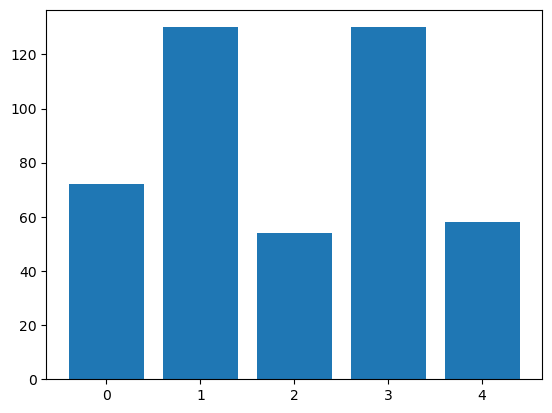

In [39]:
class_list = ['0', '1', '2', '3', '4']
x = [0, 1, 2, 3, 4]
plt.bar(x, values)
plt.xticks(x, class_list)

In [42]:
df_stat_0 = df_stat.query('tier == 0')
df_stat_1 = df_stat.query('tier == 1')
df_stat_2 = df_stat.query('tier == 2')
df_stat_3 = df_stat.query('tier == 3')
df_stat_4 = df_stat.query('tier == 4')
df_stat_0

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x,tier
8,16,유희관,두산,5.02,27,10,11,0,0,0.476,...,37,5,8,4,4,1,0,2020,1.38,0
17,7,김민우,한화,4.34,26,5,10,0,0,0.333,...,16,1,5,4,3,10,2,2020,3.11,0
20,12,장시환,한화,5.02,26,4,14,0,0,0.222,...,27,1,2,6,0,10,0,2020,2.05,0
48,9,배제성,KT,3.95,26,10,7,0,0,0.588,...,30,1,3,3,0,11,1,2020,3.43,0
49,10,쿠에바스,KT,4.10,27,10,8,0,0,0.556,...,26,1,5,8,0,4,0,2020,3.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,11,반즈,롯데,3.28,30,11,10,0,0,0.524,...,34,1,9,5,1,7,0,2023,5.74,0
549,13,박세웅,롯데,3.45,27,9,7,0,0,0.563,...,24,0,6,4,1,10,0,2023,4.63,0
577,4,원태인,삼성,3.24,26,7,7,0,0,0.500,...,26,1,5,4,2,6,2,2023,4.48,0
593,8,김광현,SSG,3.53,30,9,8,0,0,0.529,...,30,0,6,10,0,5,0,2023,4.48,0


In [43]:
df_stat_1

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x,tier
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,14,0,2,0,2,1,0,2020,0.83,1
11,20,이승진,두산,5.61,33,2,4,0,5,0.333,...,12,2,2,2,1,0,0,2020,0.35,1
13,2,윤대경,한화,1.59,55,5,0,0,7,1.000,...,7,0,4,2,3,1,0,2020,1.31,1
14,3,강재민,한화,2.57,50,1,2,1,14,0.333,...,5,0,3,1,1,2,1,2020,1.78,1
15,4,김진영,한화,3.33,58,3,3,0,8,0.500,...,4,0,1,2,0,5,0,2020,0.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,8,이승현,삼성,3.60,60,4,4,0,14,0.500,...,12,1,3,1,1,2,0,2023,0.55,1
582,13,김대우,삼성,4.50,44,0,2,0,4,0.000,...,9,1,5,5,1,1,0,2023,0.29,1
596,11,최민준,SSG,4.20,53,5,3,1,7,0.625,...,10,2,5,2,1,2,0,2023,0.28,1
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,13,1,3,3,2,3,0,2023,-0.15,1


In [44]:
df_stat_salary = pd.merge(df_stat, df_c, on = ['선수명', '팀명', '순위', 'ERA', 'G', 'W', 'WHIP'], how = 'left')

In [45]:
df_stat_salary

,순위,선수명,팀명,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [46]:
df_stat_salary_0 = df_stat_salary.query('tier == 0')
df_stat_salary_1 = df_stat_salary.query('tier == 1')
df_stat_salary_2 = df_stat_salary.query('tier == 2')
df_stat_salary_3 = df_stat_salary.query('tier == 3')
df_stat_salary_4 = df_stat_salary.query('tier == 4')

In [47]:
df_stat_salary_4

,순위,선수명,팀명,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
5,15,홍건희,두산,4.98,60,3,4,1,8,0.429,...,3,3,1,0,3,0,2020,5300.0,0.37,11000.0
68,18,김윤식,LG,6.25,23,2,4,0,2,0.333,...,1,4,5,0,2,1,2020,2700.0,0.40,5000.0
80,5,구창모,NC,1.74,15,9,0,0,1,1.000,...,0,2,1,0,2,0,2020,18000.0,4.89,25000.0
83,8,송명기,NC,3.70,36,9,3,0,0,0.750,...,0,7,2,1,7,0,2020,2700.0,2.34,11000.0
90,19,김영규,NC,5.45,20,2,2,0,1,0.500,...,2,1,4,0,5,2,2020,6300.0,0.24,8300.0
93,25,이재학,NC,6.55,19,5,6,0,0,0.455,...,1,1,5,0,4,1,2020,27500.0,0.49,20000.0
111,14,김대우,삼성,5.10,28,3,7,0,1,0.300,...,1,1,4,0,1,1,2020,11500.0,0.91,15500.0
117,8,홍건희,두산,2.78,65,6,6,3,17,0.500,...,0,2,2,0,7,1,2021,11000.0,2.39,25000.0
124,20,이영하,두산,6.29,35,5,6,1,2,0.455,...,0,5,4,0,7,0,2021,19000.0,-0.04,16000.0


In [48]:
df_stat_salary_4.describe()

,순위,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,IP_x,H_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000
mean,12.534483,4.260862,40.120690,3.931034,4.879310,1.862069,6.431034,0.433000,76.931034,19.284483,...,1.224138,3.844828,2.948276,1.224138,3.810345,0.396552,2021.810345,14337.241379,1.24569,21239.827586
std,6.451480,1.358262,21.792545,2.476996,2.144578,6.010074,9.317239,0.215212,10.067948,32.896119,...,1.228936,2.100975,1.560729,1.611832,2.219980,0.619554,1.083479,12866.925612,1.10462,20665.094436
min,1.000000,1.740000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.62000,3600.000000
25%,6.500000,3.252500,19.000000,2.000000,4.000000,0.000000,0.000000,0.286000,69.000000,0.600000,...,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2021.000000,3525.000000,0.37500,9170.000000
50%,12.000000,3.955000,35.000000,3.500000,5.000000,0.000000,1.500000,0.455000,77.000000,0.600000,...,1.000000,4.000000,3.000000,0.000000,4.000000,0.000000,2022.000000,10750.000000,1.17500,15750.000000
75%,18.000000,5.175000,62.250000,5.000000,6.000000,1.000000,9.750000,0.556000,82.750000,36.900000,...,2.000000,5.000000,4.000000,2.000000,5.000000,1.000000,2023.000000,19750.000000,1.96750,25000.000000
max,25.000000,7.110000,76.000000,12.000000,11.000000,42.000000,34.000000,1.000000,100.000000,109.000000,...,6.000000,8.000000,6.000000,6.000000,8.000000,2.000000,2023.000000,66000.000000,4.89000,110000.000000


In [49]:
df_stat_salary_3.describe()

,순위,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,IP_x,H_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.753846,4.472692,40.584615,2.100000,2.030769,1.776923,6.292308,0.516262,41.176923,14.013077,...,0.623077,2.446154,1.869231,0.992308,2.200000,0.192308,2021.353846,11542.307692,0.449308,11766.538462
std,6.526109,1.550685,13.856845,1.544432,1.539850,4.539688,6.085242,0.319952,5.613474,20.938427,...,0.790107,1.580215,1.526959,1.067462,2.047498,0.450601,1.126575,14985.149576,0.657859,12400.614808
min,2.000000,1.570000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3400.000000
25%,7.000000,3.302500,33.000000,1.000000,1.000000,0.000000,1.000000,0.250000,36.000000,0.300000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2020.000000,3750.000000,-0.060000,6000.000000
50%,13.500000,4.535000,42.000000,2.000000,2.000000,0.000000,5.000000,0.500000,41.000000,0.600000,...,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2021.000000,7000.000000,0.365000,8700.000000
75%,18.000000,5.557500,50.000000,3.000000,3.000000,1.000000,10.000000,0.750000,45.750000,32.750000,...,1.000000,3.750000,3.000000,2.000000,3.000000,0.000000,2022.000000,12000.000000,0.915000,12950.000000
max,25.000000,10.760000,75.000000,7.000000,7.000000,23.000000,27.000000,1.000000,57.000000,68.000000,...,3.000000,6.000000,7.000000,5.000000,11.000000,2.000000,2023.000000,120000.000000,2.550000,110000.000000


In [50]:
df_stat_salary_2.describe()

,순위,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,IP_x,H_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,13.018519,4.386296,27.111111,6.666667,7.407407,0.166667,0.555556,0.473130,115.425926,42.440741,...,1.666667,4.444444,3.851852,0.629630,4.185185,0.351852,2021.500000,19775.925926,2.290370,24238.888889
std,5.433963,0.993859,7.530233,2.613463,2.688329,0.841158,1.621398,0.162141,12.570708,58.413964,...,1.273829,2.245891,2.077802,0.734495,2.110835,0.519703,1.193536,19719.437161,1.371182,23152.329168
min,2.000000,2.100000,18.000000,3.000000,0.000000,0.000000,0.000000,0.231000,86.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.220000,3000.000000
25%,9.000000,3.792500,23.000000,5.000000,6.000000,0.000000,0.000000,0.333000,107.000000,0.375000,...,1.000000,3.000000,3.000000,0.000000,3.000000,0.000000,2020.000000,6125.000000,1.367500,10050.000000
50%,13.500000,4.225000,24.500000,6.500000,7.500000,0.000000,0.000000,0.471000,114.000000,0.600000,...,1.000000,4.500000,4.000000,0.500000,4.000000,0.000000,2022.000000,13000.000000,2.300000,15000.000000
75%,17.000000,5.077500,30.500000,8.000000,9.000000,0.000000,0.000000,0.538000,125.500000,104.500000,...,3.000000,6.000000,5.000000,1.000000,6.000000,1.000000,2023.000000,26000.000000,2.975000,27250.000000
max,24.000000,6.790000,50.000000,13.000000,13.000000,6.000000,9.000000,1.000000,151.000000,148.000000,...,4.000000,11.000000,9.000000,3.000000,9.000000,2.000000,2023.000000,80000.000000,7.930000,100000.000000


In [51]:
df_stat_salary_1.describe()

,순위,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,IP_x,H_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.869231,4.061385,49.492308,3.315385,3.369231,6.038462,7.646154,0.477400,57.900000,26.236923,...,0.938462,3.123077,2.246154,1.653846,2.784615,0.176923,2021.476923,17852.153846,0.860692,21840.307692
std,5.955114,1.323002,19.103247,1.968884,1.813551,10.960397,8.142968,0.223228,6.675014,29.184251,...,1.024913,1.800152,1.580215,1.631623,2.563865,0.473571,1.149421,27084.019545,0.797590,28311.755685
min,1.000000,1.480000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.740000,3900.000000
25%,6.000000,3.145000,40.000000,2.000000,2.000000,0.000000,0.000000,0.333000,52.000000,0.300000,...,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2020.000000,5225.000000,0.252500,8325.000000
50%,10.500000,4.080000,56.000000,3.000000,3.000000,0.000000,5.000000,0.500000,58.000000,0.600000,...,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2021.000000,10000.000000,0.760000,15000.000000
75%,15.000000,4.850000,63.000000,5.000000,4.000000,5.000000,12.000000,0.625000,62.000000,55.000000,...,1.000000,4.000000,3.000000,3.000000,4.000000,0.000000,2023.000000,18875.000000,1.307500,23750.000000
max,25.000000,7.400000,80.000000,9.000000,9.000000,44.000000,35.000000,1.000000,75.000000,88.000000,...,5.000000,9.000000,7.000000,8.000000,15.000000,2.000000,2023.000000,180000.000000,2.740000,180000.000000


In [52]:
df_stat_salary_0.describe()

,순위,ERA,G,W,L_x,SV_x,HLD_x,WPCT_x,IP_x,H_x,...,3B_y,SAC_y,SF_y,IBB_y,WP_y,BK_y,연도_y,현재연봉,WAR_x_y,예측연봉
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000
mean,8.513889,3.553056,28.472222,10.861111,8.013889,0.0,0.027778,0.571042,161.763889,50.655556,...,1.888889,5.708333,4.263889,0.916667,6.194444,0.458333,2021.444444,55847.222222,4.46500,60090.277778
std,4.145227,0.755406,2.136024,3.247125,2.480874,0.0,0.165489,0.133394,17.369630,72.398875,...,1.487559,2.800591,2.181827,1.241875,4.047739,0.821155,1.073219,96720.940204,1.57373,43704.024244
min,1.000000,2.110000,24.000000,4.000000,2.000000,0.0,0.000000,0.222000,131.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,4000.000000,1.38000,9000.000000
25%,5.000000,3.050000,27.000000,9.000000,7.000000,0.0,0.000000,0.476000,146.000000,0.300000,...,1.000000,3.750000,2.750000,0.000000,3.000000,0.000000,2021.000000,15000.000000,3.36750,24975.000000
50%,9.000000,3.560000,28.000000,11.000000,8.000000,0.0,0.000000,0.572000,161.000000,0.600000,...,2.000000,6.000000,4.000000,1.000000,6.000000,0.000000,2021.000000,34500.000000,4.30000,43500.000000
75%,11.250000,3.985000,30.000000,13.000000,10.000000,0.0,0.000000,0.648250,174.000000,133.500000,...,3.000000,8.000000,6.000000,1.000000,8.250000,1.000000,2022.000000,71250.000000,5.69250,90000.000000
max,20.000000,5.230000,35.000000,19.000000,14.000000,0.0,1.000000,0.846000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.45000,200000.000000


In [55]:
km = KMeans(n_clusters = 3)
km.fit(df_stat_copy)
pred = km.predict(df_stat_copy)

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [56]:
df_stat_copy['tier'] = pred

In [57]:
df_stat_copy

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,WAR_x,tier
0,4,2.89,63,4,4,0,7,0.500,71.0,0.6,...,0.238,12,2,3,2,4,1,0,1.45,1
3,9,3.80,42,10,2,0,0,0.833,123.0,134.0,...,0.277,23,3,2,4,0,2,1,3.46,2
4,11,4.64,42,5,11,6,0,0.313,132.0,148.0,...,0.284,26,1,7,6,3,4,1,2.39,0
5,12,4.83,42,1,0,2,7,1.000,41.0,51.0,...,0.315,6,1,4,5,1,1,0,0.41,1
6,13,4.89,29,1,2,1,0,0.333,53.0,0.3,...,0.230,14,0,2,0,2,1,0,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,5.23,28,8,10,0,0,0.444,144.0,0.6,...,0.283,22,2,5,7,0,11,0,1.64,0
600,15,5.23,50,5,8,1,9,0.385,105.0,138.0,...,0.319,27,1,4,2,1,3,0,0.78,2
601,16,5.62,50,6,1,0,5,0.857,57.0,0.6,...,0.289,13,1,3,3,2,3,0,-0.15,1
602,17,5.70,17,3,3,0,0,0.500,47.0,0.3,...,0.257,9,1,4,4,0,8,2,0.08,1


In [58]:
df_class_group_c = df_stat_copy.groupby('tier')
values = df_class_group_c['tier'].agg('count').to_list()

([<matplotlib.axis.XTick at 0x1e36afc7750>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

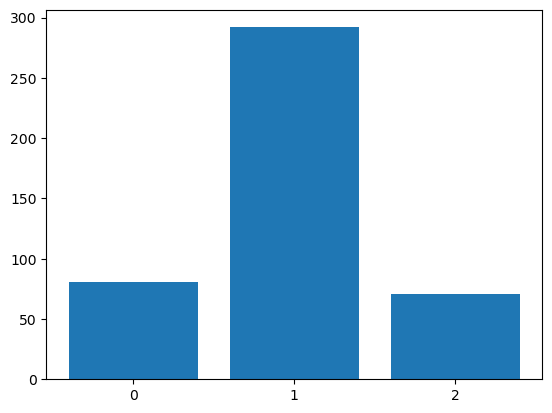

In [59]:
class_list = ['0', '1', '2']
x = [0, 1, 2]
plt.bar(x, values)
plt.xticks(x, class_list)

In [60]:
df_stat_salary_c0 = df_stat_copy.query('tier == 0')
df_stat_salary_c1 = df_stat_copy.query('tier == 1')
df_stat_salary_c2 = df_stat_copy.query('tier == 2')

In [61]:
df_stat_salary_c0.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,AVG,2B,3B,SAC,SF,IBB,WP,BK,WAR_x,tier
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,8.987654,3.648148,28.209877,10.555556,8.049383,0.074074,0.024691,0.562728,158.358025,48.183951,...,0.250914,25.407407,1.901235,5.592593,4.296296,0.901235,5.962963,0.506173,4.329877,0.0
std,4.506922,0.848142,2.888408,3.267262,2.484458,0.666667,0.156150,0.135713,19.214779,70.867603,...,0.025076,6.115100,1.462916,2.755802,2.210455,1.220706,3.900142,0.808138,1.651273,0.0
min,1.000000,2.110000,23.000000,4.000000,2.000000,0.000000,0.000000,0.222000,122.000000,0.300000,...,0.188000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.380000,0.0
25%,5.000000,3.050000,26.000000,8.000000,7.000000,0.000000,0.000000,0.471000,144.000000,0.300000,...,0.236000,21.000000,1.000000,4.000000,3.000000,0.000000,3.000000,0.000000,3.110000,0.0
50%,9.000000,3.600000,28.000000,10.000000,8.000000,0.000000,0.000000,0.563000,158.000000,0.600000,...,0.249000,26.000000,2.000000,6.000000,4.000000,1.000000,6.000000,0.000000,4.200000,0.0
75%,12.000000,4.100000,30.000000,13.000000,10.000000,0.000000,0.000000,0.647000,173.000000,131.000000,...,0.268000,30.000000,3.000000,7.000000,6.000000,1.000000,7.000000,1.000000,5.650000,0.0
max,22.000000,5.910000,42.000000,19.000000,14.000000,6.000000,1.000000,0.846000,207.000000,183.000000,...,0.335000,40.000000,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,8.450000,0.0


In [65]:
team_salary = pd.read_csv('./team_salary.csv')
team_salary

,팀,현재연봉_mean,현재연봉_min,현재연봉_max,예측연봉_mean,예측연봉_min,예측연봉_max
0,KIA,13590.243902,2700.0,100000.0,16360.975610,3500.0,100000.0
1,KT,19436.363636,2700.0,100000.0,30938.636364,4000.0,200000.0
2,LG,22585.416667,2700.0,105000.0,24579.166667,5000.0,105000.0
3,NC,17964.444444,2700.0,130000.0,22844.444444,4000.0,160000.0
4,SSG,44761.538462,2700.0,810000.0,34192.307692,3000.0,180000.0
5,두산,15927.500000,2900.0,55000.0,22347.500000,3600.0,160000.0
6,롯데,19024.166667,2700.0,150000.0,27301.250000,4100.0,150000.0
7,삼성,33977.272727,2700.0,160000.0,34677.272727,3600.0,160000.0
8,키움,18557.777778,2700.0,90000.0,22062.222222,3800.0,120000.0
9,한화,16215.600000,2700.0,80000.0,18796.800000,3400.0,80000.0


In [4]:
df_cat = data.copy()

In [67]:
df_cat_copy = df_cat.copy()

In [69]:
df_cat_copy = df_cat_copy.drop(['선수명', '팀명'], axis = 1)

In [5]:
stat = pd.read_csv('./pitcher_stat.csv')
stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,2B,3B,SAC,SF,IBB,WP,BK,연도,WAR_x,tier
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,12,2,3,2,4,1,0,2020,1.45,4
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,23,3,2,4,0,2,1,2020,3.46,2
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,26,1,7,6,3,4,1,2020,2.39,2
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,6,1,4,5,1,1,0,2020,0.41,3
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,14,0,2,0,2,1,0,2020,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,22,2,5,7,0,11,0,2023,1.64,0
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,27,1,4,2,1,3,0,2023,0.78,2
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,13,1,3,3,2,3,0,2023,-0.15,1
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,9,1,4,4,0,8,2,2023,0.08,1


In [6]:
df_cat.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [7]:
stat.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'tier'],
      dtype='object')

In [8]:
stat_salary = pd.merge(df_cat, stat, on = ['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x'], how = 'left')

In [9]:
stat_salary

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,3,2,4,1,0,2020,8000.0,1.45,16000.0,4.0
1,7,김명신,두산,3.52,16,0,1,0,0,0.000,...,2,0,0,0,0,2020,5200.0,0.29,4500.0,NaN
2,8,김강률,두산,3.54,30,2,2,0,0,0.500,...,0,1,0,0,0,2020,15000.0,-0.37,11000.0,NaN
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2,4,0,2,1,2020,5900.0,3.46,16000.0,2.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,7,6,3,4,1,2020,27000.0,2.39,19000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,5,7,0,11,0,2023,14000.0,1.64,14000.0,0.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,4,2,1,3,0,2023,70000.0,0.78,18000.0,2.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3,3,2,3,0,2023,3000.0,-0.15,7400.0,1.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4,4,0,8,2,2023,3000.0,0.08,4500.0,1.0


In [10]:
stat_salary = stat_salary.dropna()

In [11]:
stat_salary = stat_salary.drop_duplicates()

In [12]:
stat_salary

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,3,2,4,1,0,2020,8000.0,1.45,16000.0,4.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2,4,0,2,1,2020,5900.0,3.46,16000.0,2.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,7,6,3,4,1,2020,27000.0,2.39,19000.0,2.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,4,5,1,1,0,2020,21000.0,0.41,15600.0,3.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,2,0,2,1,0,2020,2900.0,0.83,5500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,5,7,0,11,0,2023,14000.0,1.64,14000.0,0.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,4,2,1,3,0,2023,70000.0,0.78,18000.0,2.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3,3,2,3,0,2023,3000.0,-0.15,7400.0,1.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4,4,0,8,2,2023,3000.0,0.08,4500.0,1.0


In [13]:
stat_salary.to_csv('pitcher_stat_salary.csv', index = False)

In [14]:
stat_salary

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,3,2,4,1,0,2020,8000.0,1.45,16000.0,4.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2,4,0,2,1,2020,5900.0,3.46,16000.0,2.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,7,6,3,4,1,2020,27000.0,2.39,19000.0,2.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,4,5,1,1,0,2020,21000.0,0.41,15600.0,3.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,2,0,2,1,0,2020,2900.0,0.83,5500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,5,7,0,11,0,2023,14000.0,1.64,14000.0,0.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,4,2,1,3,0,2023,70000.0,0.78,18000.0,2.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3,3,2,3,0,2023,3000.0,-0.15,7400.0,1.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4,4,0,8,2,2023,3000.0,0.08,4500.0,1.0


In [15]:
stat_salary["salary_changed"] = stat_salary['예측연봉'] - stat_salary['현재연봉']

In [16]:
stat_salary

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,4,1,0,2020,8000.0,1.45,16000.0,4.0,8000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4,0,2,1,2020,5900.0,3.46,16000.0,2.0,10100.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,6,3,4,1,2020,27000.0,2.39,19000.0,2.0,-8000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,5,1,1,0,2020,21000.0,0.41,15600.0,3.0,-5400.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,1,0,2020,2900.0,0.83,5500.0,1.0,2600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,7,0,11,0,2023,14000.0,1.64,14000.0,0.0,0.0
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,2,1,3,0,2023,70000.0,0.78,18000.0,2.0,-52000.0
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3,2,3,0,2023,3000.0,-0.15,7400.0,1.0,4400.0
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4,0,8,2,2023,3000.0,0.08,4500.0,1.0,1500.0


In [17]:
stat_salary.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'salary_changed'],
      dtype='object')

In [18]:
stat_corr = stat_salary[['ERA', 'W', 'L', 'SV', 'HLD', 'IP', 'WAR_x', 'QS', 'SO', 'salary_changed']].corr()

<Axes: >

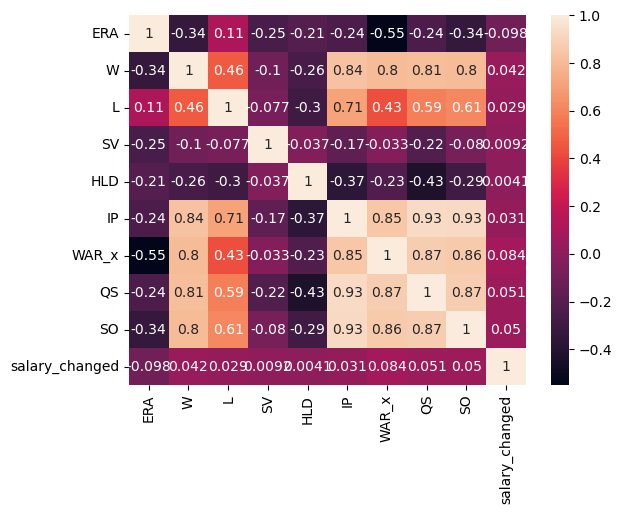

In [19]:
sns.heatmap(stat_corr, annot = True)

In [21]:
stat_salary0 = stat_salary.query('tier == 0')
stat_salary1 = stat_salary.query('tier == 1')
stat_salary2 = stat_salary.query('tier == 2')
stat_salary3 = stat_salary.query('tier == 3')
stat_salary4 = stat_salary.query('tier == 4')

In [22]:
stat_salary0.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000,72.0,72.000000
mean,8.513889,3.553056,28.472222,10.861111,8.013889,0.0,0.027778,0.571042,161.763889,50.655556,...,4.263889,0.916667,6.194444,0.458333,2021.444444,55847.222222,4.46500,60090.277778,0.0,4243.055556
std,4.145227,0.755406,2.136024,3.247125,2.480874,0.0,0.165489,0.133394,17.369630,72.398875,...,2.181827,1.241875,4.047739,0.821155,1.073219,96720.940204,1.57373,43704.024244,0.0,90495.552496
min,1.000000,2.110000,24.000000,4.000000,2.000000,0.0,0.000000,0.222000,131.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,4000.000000,1.38000,9000.000000,0.0,-710000.000000
25%,5.000000,3.050000,27.000000,9.000000,7.000000,0.0,0.000000,0.476000,146.000000,0.300000,...,2.750000,0.000000,3.000000,0.000000,2021.000000,15000.000000,3.36750,24975.000000,0.0,2750.000000
50%,9.000000,3.560000,28.000000,11.000000,8.000000,0.0,0.000000,0.572000,161.000000,0.600000,...,4.000000,1.000000,6.000000,0.000000,2021.000000,34500.000000,4.30000,43500.000000,0.0,8250.000000
75%,11.250000,3.985000,30.000000,13.000000,10.000000,0.0,0.000000,0.648250,174.000000,133.500000,...,6.000000,1.000000,8.250000,1.000000,2022.000000,71250.000000,5.69250,90000.000000,0.0,20000.000000
max,20.000000,5.230000,35.000000,19.000000,14.000000,0.0,1.000000,0.846000,207.000000,183.000000,...,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.45000,200000.000000,0.0,157000.000000


In [23]:
stat_salary1.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000
mean,10.869231,4.061385,49.492308,3.315385,3.369231,6.038462,7.646154,0.477400,57.900000,26.236923,...,2.246154,1.653846,2.784615,0.176923,2021.476923,17852.153846,0.860692,21840.307692,1.0,3988.153846
std,5.955114,1.323002,19.103247,1.968884,1.813551,10.960397,8.142968,0.223228,6.675014,29.184251,...,1.580215,1.631623,2.563865,0.473571,1.149421,27084.019545,0.797590,28311.755685,0.0,24979.699379
min,1.000000,1.480000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.740000,3900.000000,1.0,-130000.000000
25%,6.000000,3.145000,40.000000,2.000000,2.000000,0.000000,0.000000,0.333000,52.000000,0.300000,...,1.000000,0.000000,1.000000,0.000000,2020.000000,5225.000000,0.252500,8325.000000,1.0,125.000000
50%,10.500000,4.080000,56.000000,3.000000,3.000000,0.000000,5.000000,0.500000,58.000000,0.600000,...,2.000000,1.000000,2.000000,0.000000,2021.000000,10000.000000,0.760000,15000.000000,1.0,3050.000000
75%,15.000000,4.850000,63.000000,5.000000,4.000000,5.000000,12.000000,0.625000,62.000000,55.000000,...,3.000000,3.000000,4.000000,0.000000,2023.000000,18875.000000,1.307500,23750.000000,1.0,6695.000000
max,25.000000,7.400000,80.000000,9.000000,9.000000,44.000000,35.000000,1.000000,75.000000,88.000000,...,7.000000,8.000000,15.000000,2.000000,2023.000000,180000.000000,2.740000,180000.000000,1.0,148000.000000


In [24]:
stat_salary2.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,13.018519,4.386296,27.111111,6.666667,7.407407,0.166667,0.555556,0.473130,115.425926,42.440741,...,3.851852,0.629630,4.185185,0.351852,2021.500000,19775.925926,2.290370,24238.888889,2.0,4462.962963
std,5.433963,0.993859,7.530233,2.613463,2.688329,0.841158,1.621398,0.162141,12.570708,58.413964,...,2.077802,0.734495,2.110835,0.519703,1.193536,19719.437161,1.371182,23152.329168,0.0,17757.998956
min,2.000000,2.100000,18.000000,3.000000,0.000000,0.000000,0.000000,0.231000,86.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.220000,3000.000000,2.0,-52000.000000
25%,9.000000,3.792500,23.000000,5.000000,6.000000,0.000000,0.000000,0.333000,107.000000,0.375000,...,3.000000,0.000000,3.000000,0.000000,2020.000000,6125.000000,1.367500,10050.000000,2.0,125.000000
50%,13.500000,4.225000,24.500000,6.500000,7.500000,0.000000,0.000000,0.471000,114.000000,0.600000,...,4.000000,0.500000,4.000000,0.000000,2022.000000,13000.000000,2.300000,15000.000000,2.0,3650.000000
75%,17.000000,5.077500,30.500000,8.000000,9.000000,0.000000,0.000000,0.538000,125.500000,104.500000,...,5.000000,1.000000,6.000000,1.000000,2023.000000,26000.000000,2.975000,27250.000000,2.0,6550.000000
max,24.000000,6.790000,50.000000,13.000000,13.000000,6.000000,9.000000,1.000000,151.000000,148.000000,...,9.000000,3.000000,9.000000,2.000000,2023.000000,80000.000000,7.930000,100000.000000,2.0,55000.000000


In [25]:
stat_salary3.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000
mean,12.753846,4.472692,40.584615,2.100000,2.030769,1.776923,6.292308,0.516262,41.176923,14.013077,...,1.869231,0.992308,2.200000,0.192308,2021.353846,11542.307692,0.449308,11766.538462,3.0,224.230769
std,6.526109,1.550685,13.856845,1.544432,1.539850,4.539688,6.085242,0.319952,5.613474,20.938427,...,1.526959,1.067462,2.047498,0.450601,1.126575,14985.149576,0.657859,12400.614808,0.0,7746.495168
min,2.000000,1.570000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3400.000000,3.0,-50000.000000
25%,7.000000,3.302500,33.000000,1.000000,1.000000,0.000000,1.000000,0.250000,36.000000,0.300000,...,1.000000,0.000000,1.000000,0.000000,2020.000000,3750.000000,-0.060000,6000.000000,3.0,-450.000000
50%,13.500000,4.535000,42.000000,2.000000,2.000000,0.000000,5.000000,0.500000,41.000000,0.600000,...,2.000000,1.000000,2.000000,0.000000,2021.000000,7000.000000,0.365000,8700.000000,3.0,1100.000000
75%,18.000000,5.557500,50.000000,3.000000,3.000000,1.000000,10.000000,0.750000,45.750000,32.750000,...,3.000000,2.000000,3.000000,0.000000,2022.000000,12000.000000,0.915000,12950.000000,3.0,3000.000000
max,25.000000,10.760000,75.000000,7.000000,7.000000,23.000000,27.000000,1.000000,57.000000,68.000000,...,7.000000,5.000000,11.000000,2.000000,2023.000000,120000.000000,2.550000,110000.000000,3.0,30000.000000


In [26]:
stat_salary4.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.0,58.000000
mean,12.534483,4.260862,40.120690,3.931034,4.879310,1.862069,6.431034,0.433000,76.931034,19.284483,...,2.948276,1.224138,3.810345,0.396552,2021.810345,14337.241379,1.24569,21239.827586,4.0,6902.586207
std,6.451480,1.358262,21.792545,2.476996,2.144578,6.010074,9.317239,0.215212,10.067948,32.896119,...,1.560729,1.611832,2.219980,0.619554,1.083479,12866.925612,1.10462,20665.094436,0.0,14228.019374
min,1.000000,1.740000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-0.62000,3600.000000,4.0,-18000.000000
25%,6.500000,3.252500,19.000000,2.000000,4.000000,0.000000,0.000000,0.286000,69.000000,0.600000,...,2.000000,0.000000,2.000000,0.000000,2021.000000,3525.000000,0.37500,9170.000000,4.0,1100.000000
50%,12.000000,3.955000,35.000000,3.500000,5.000000,0.000000,1.500000,0.455000,77.000000,0.600000,...,3.000000,0.000000,4.000000,0.000000,2022.000000,10750.000000,1.17500,15750.000000,4.0,4250.000000
75%,18.000000,5.175000,62.250000,5.000000,6.000000,1.000000,9.750000,0.556000,82.750000,36.900000,...,4.000000,2.000000,5.000000,1.000000,2023.000000,19750.000000,1.96750,25000.000000,4.0,8000.000000
max,25.000000,7.110000,76.000000,12.000000,11.000000,42.000000,34.000000,1.000000,100.000000,109.000000,...,6.000000,6.000000,8.000000,2.000000,2023.000000,66000.000000,4.89000,110000.000000,4.0,76900.000000


In [27]:
stat_salary.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,11.518018,4.164955,39.529279,4.671171,4.418919,2.551802,4.993243,0.497644,79.328829,27.680180,...,2.750000,1.159910,3.470721,0.277027,2021.481982,21940.855856,1.548896,25306.756757,1.936937,3365.900901
std,6.067873,1.325098,17.290808,3.792588,3.050397,7.160496,7.128770,0.240821,43.913520,44.048086,...,1.956208,1.370148,2.970365,0.571967,1.131187,45582.569361,1.745014,30978.441259,1.325419,39754.248564
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3000.000000,0.000000,-710000.000000
25%,6.000000,3.260000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,1.000000,0.000000,1.000000,0.000000,2020.000000,5000.000000,0.287500,8150.000000,1.000000,0.000000
50%,11.000000,3.990000,36.500000,4.000000,4.000000,0.000000,1.000000,0.500000,61.500000,0.600000,...,2.000000,1.000000,3.000000,0.000000,2021.000000,10950.000000,0.990000,14250.000000,2.000000,3000.000000
75%,16.000000,5.020000,54.250000,6.000000,6.000000,1.000000,8.000000,0.640750,107.000000,51.000000,...,4.000000,2.000000,5.000000,0.000000,2023.000000,23025.000000,2.352500,26125.000000,3.000000,6850.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000,4.000000,157000.000000


<Axes: xlabel='ERA', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

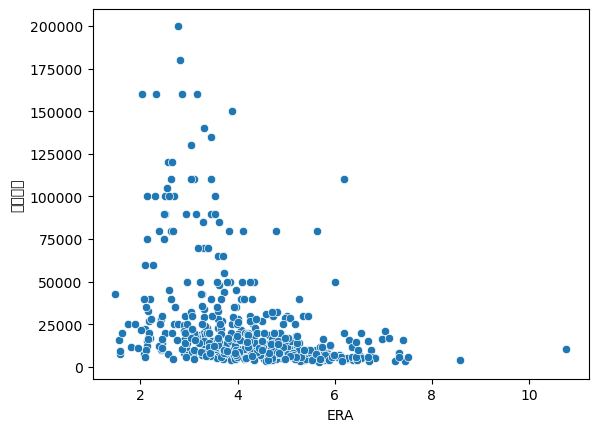

In [29]:
sns.scatterplot(x = stat_salary['ERA'], y = stat_salary['예측연봉'])

<Axes: xlabel='W', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

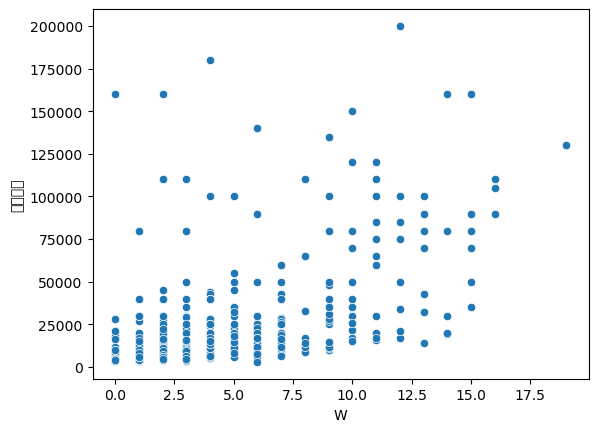

In [30]:
sns.scatterplot(x = stat_salary['W'], y = stat_salary['예측연봉'])

In [32]:
import matplotlib.pyplot as plt

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print

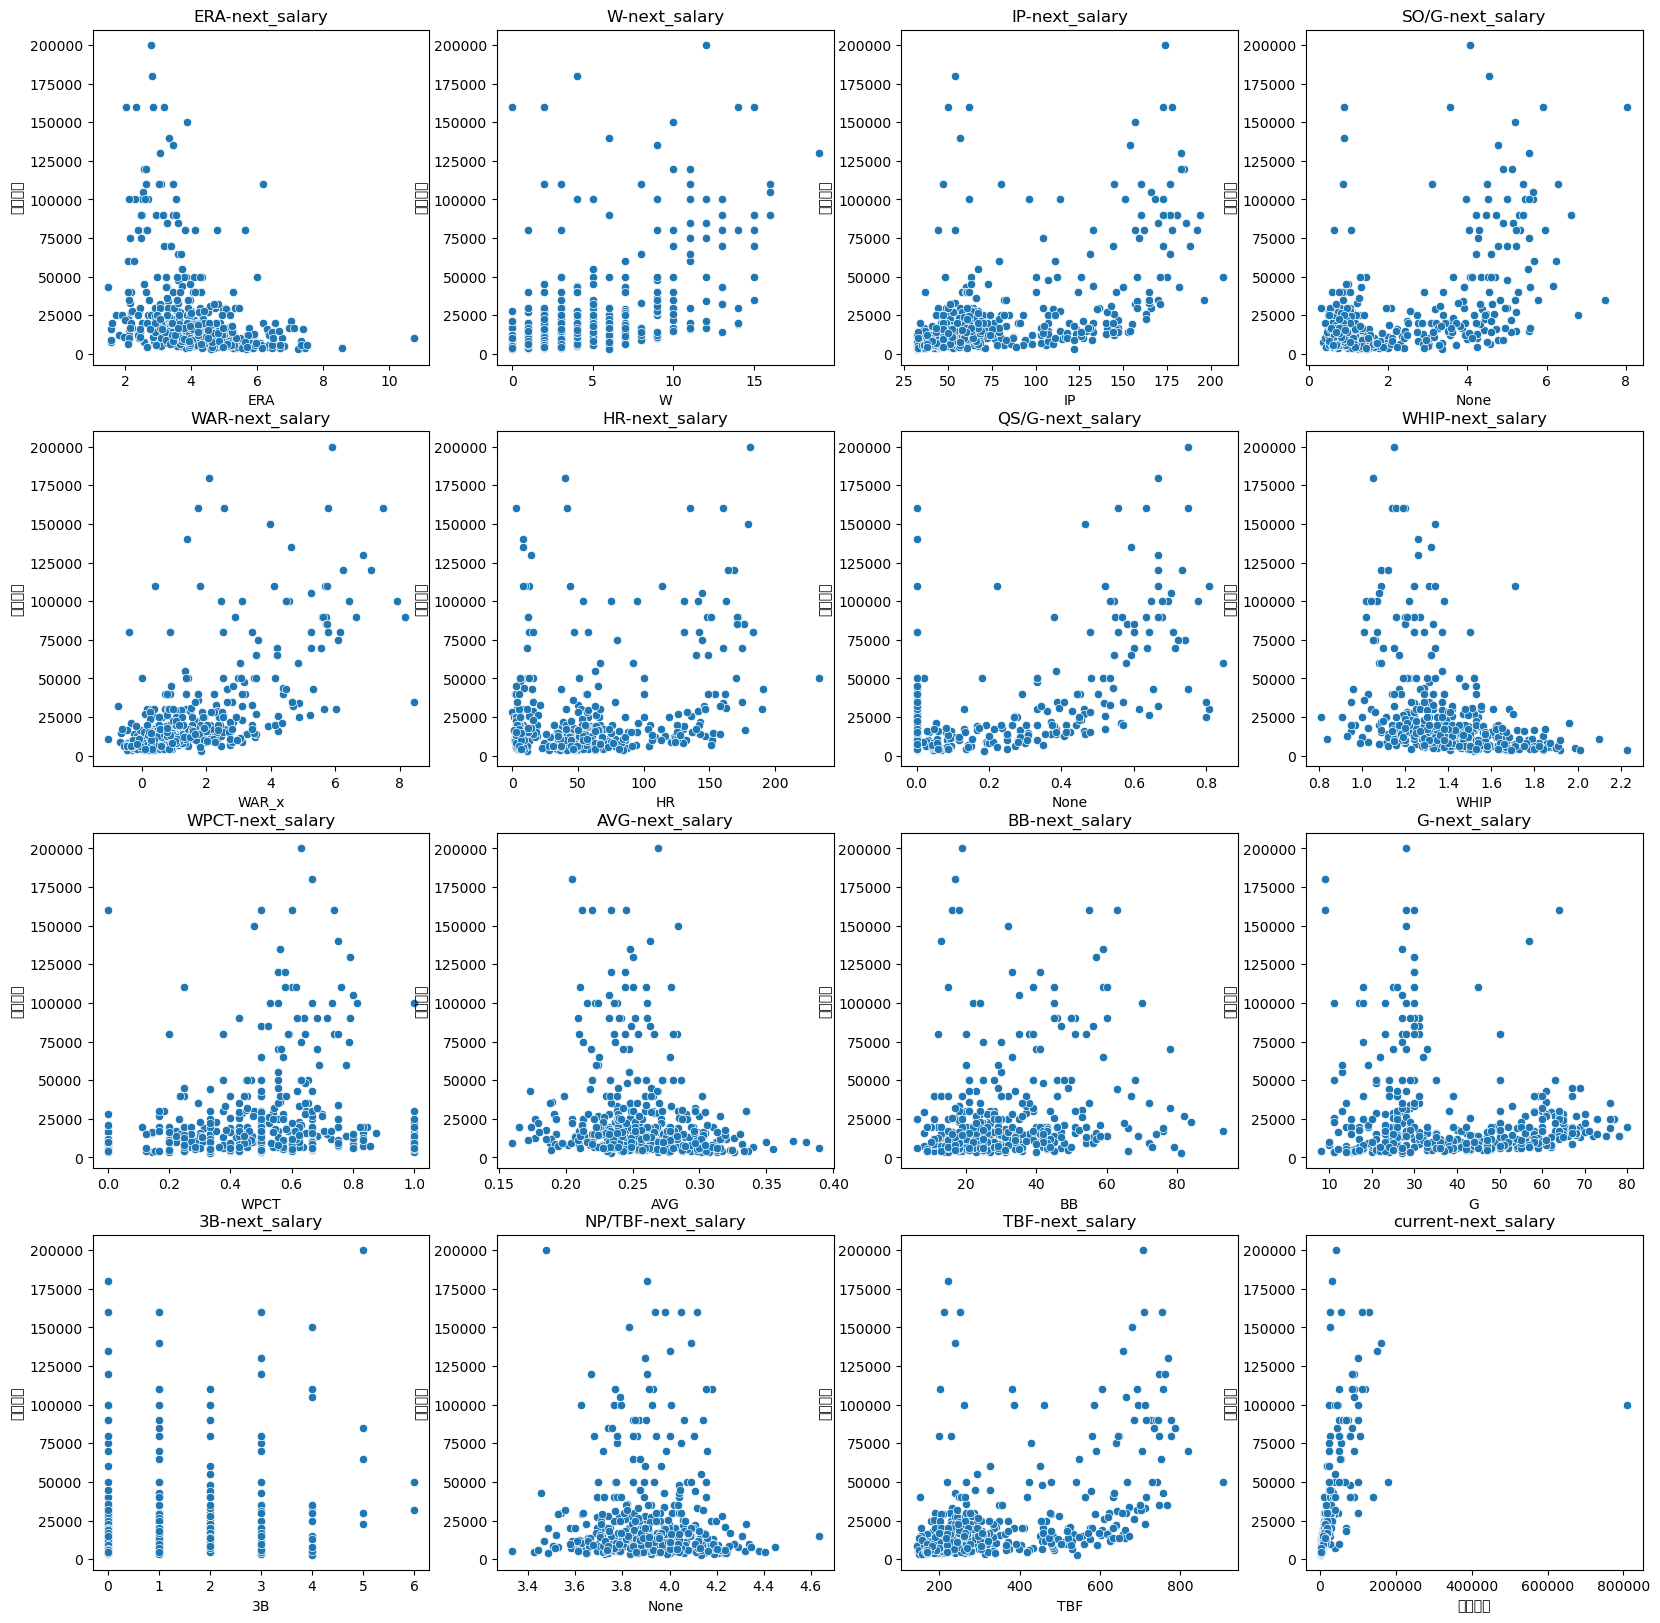

In [49]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
sns.scatterplot(x = stat_salary['ERA'], y = stat_salary['예측연봉'], ax = axes[0,0])
axes[0,0].set_title('ERA-next_salary')
sns.scatterplot(x = stat_salary['W'], y = stat_salary['예측연봉'], ax = axes[0,1])
axes[0,1].set_title('W-next_salary')
sns.scatterplot(x = stat_salary['IP'], y = stat_salary['예측연봉'], ax = axes[0,2])
axes[0,2].set_title('IP-next_salary')
sns.scatterplot(x = stat_salary['SO']/stat_salary['G'], y = stat_salary['예측연봉'], ax = axes[0,3])
axes[0,3].set_title('SO/G-next_salary')
sns.scatterplot(x = stat_salary['WAR_x'], y = stat_salary['예측연봉'], ax = axes[1,0])
axes[1,0].set_title('WAR-next_salary')
sns.scatterplot(x = stat_salary['HR'], y = stat_salary['예측연봉'], ax = axes[1,1])
axes[1, 1].set_title('HR-next_salary')
sns.scatterplot(x = stat_salary['QS']/stat_salary['G'], y = stat_salary['예측연봉'], ax = axes[1,2])
axes[1,2].set_title('QS/G-next_salary')
sns.scatterplot(x = stat_salary['WHIP'], y = stat_salary['예측연봉'], ax = axes[1, 3])
axes[1,3].set_title('WHIP-next_salary')
sns.scatterplot(x = stat_salary['WPCT'], y = stat_salary['예측연봉'], ax = axes[2,0])
axes[2,0].set_title('WPCT-next_salary')
sns.scatterplot(x = stat_salary['AVG'], y = stat_salary['예측연봉'], ax = axes[2,1])
axes[2,1].set_title('AVG-next_salary')
sns.scatterplot(x = stat_salary['BB'], y = stat_salary['예측연봉'], ax = axes[2, 2])
axes[2,2].set_title('BB-next_salary')
sns.scatterplot(x = stat_salary['G'], y = stat_salary['예측연봉'], ax = axes[2,3])
axes[2,3].set_title('G-next_salary')
sns.scatterplot(x = stat_salary['3B'], y = stat_salary['예측연봉'], ax = axes[3,0])
axes[3,0].set_title('3B-next_salary')
sns.scatterplot(x = stat_salary['NP']/stat_salary['TBF'], y = stat_salary['예측연봉'], ax = axes[3,1])
axes[3,1].set_title('NP/TBF-next_salary')
sns.scatterplot(x = stat_salary['TBF'], y = stat_salary['예측연봉'], ax = axes[3,2])
axes[3,2].set_title('TBF-next_salary')
sns.scatterplot(x = stat_salary['현재연봉'], y = stat_salary['예측연봉'], ax = axes[3,3])
axes[3,3].set_title('current-next_salary')
plt.show()

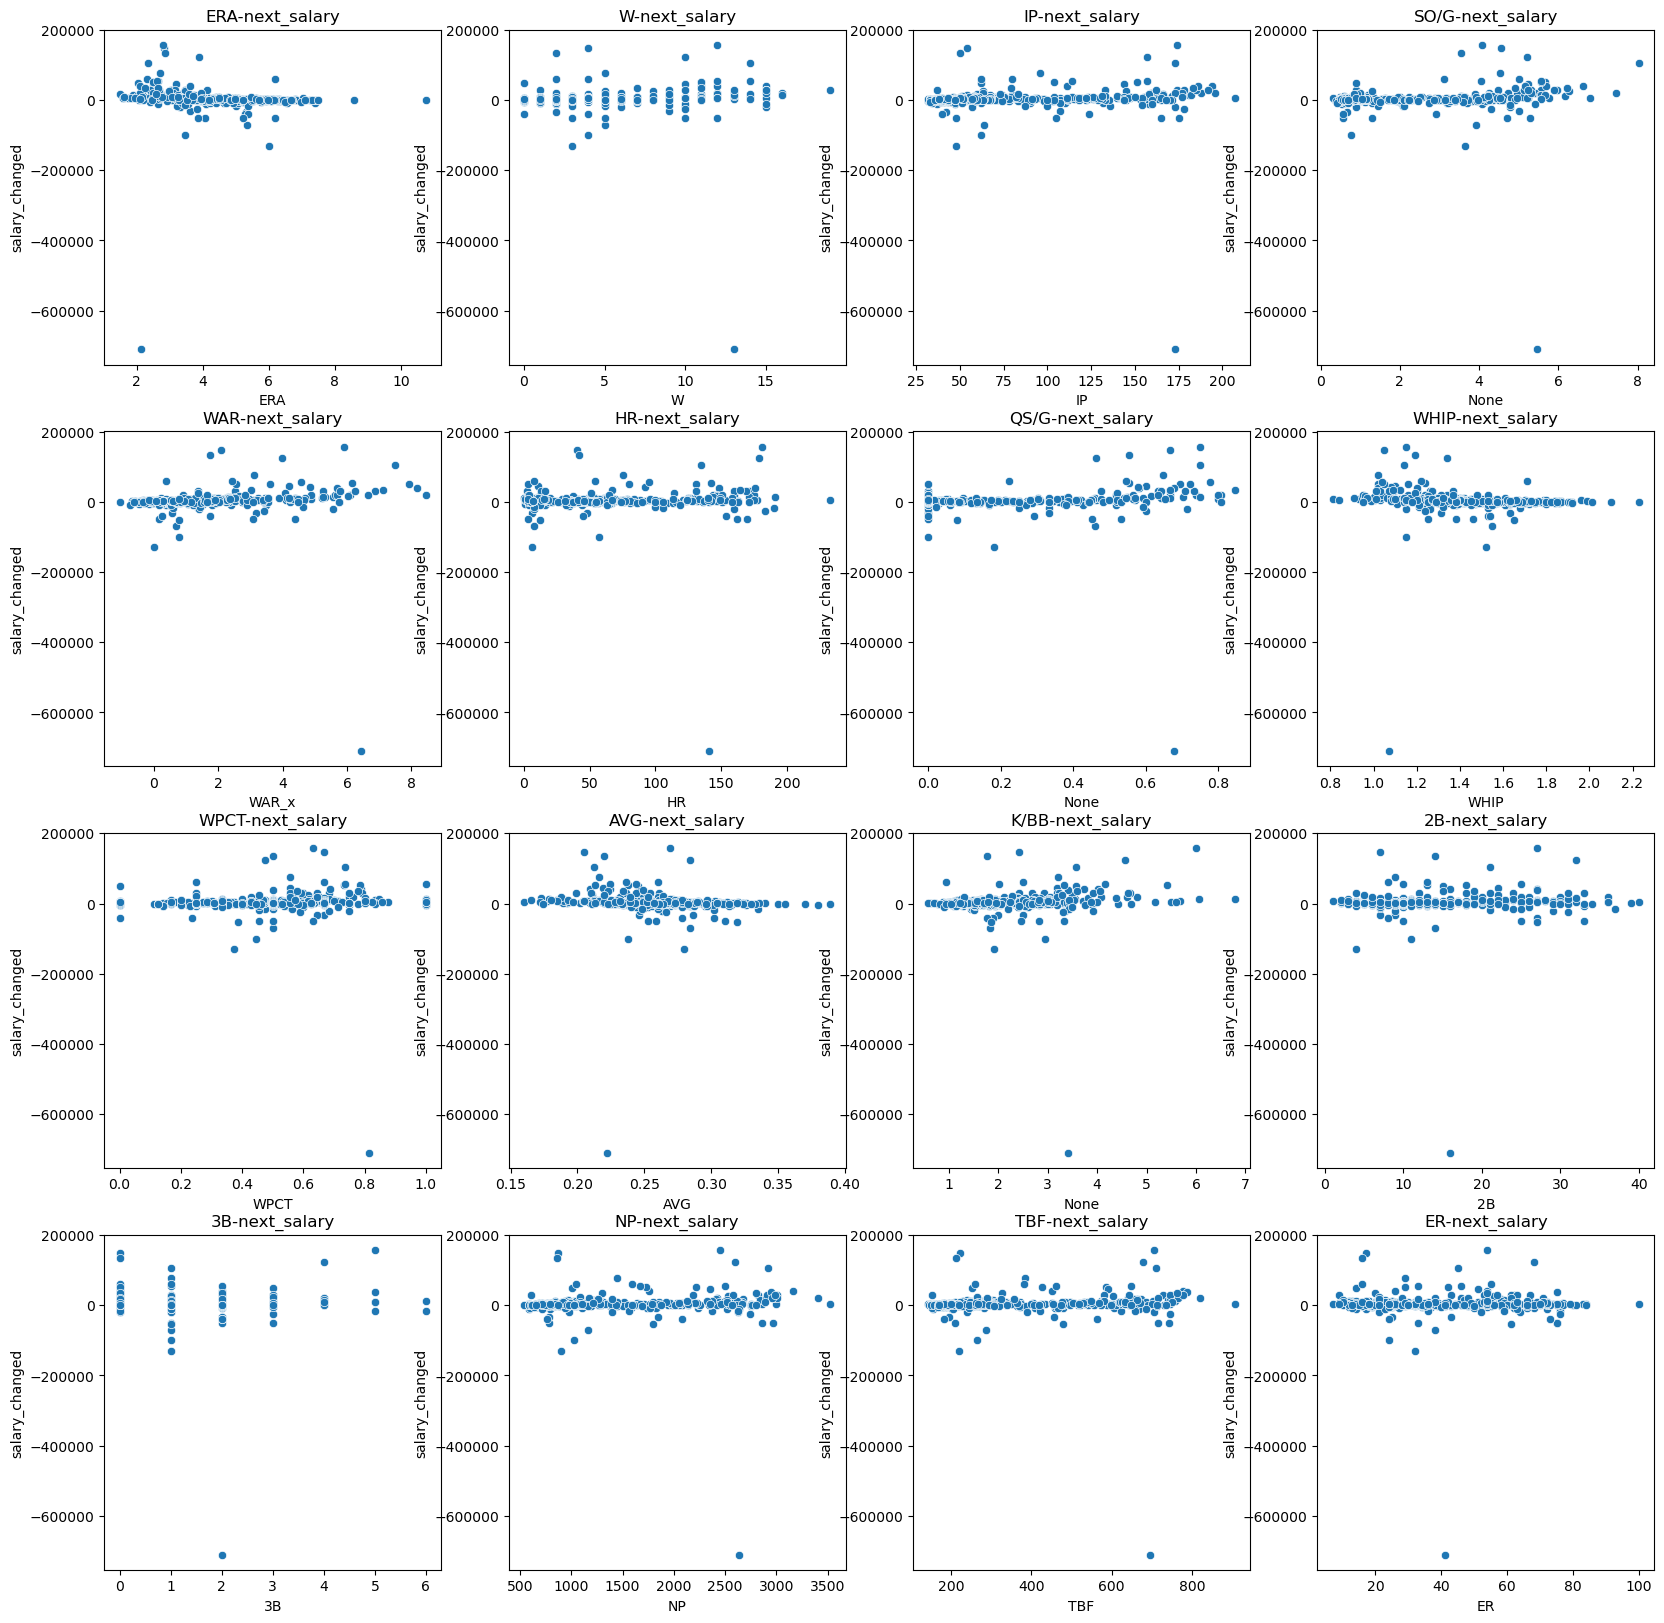

In [43]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
sns.scatterplot(x = stat_salary['ERA'], y = stat_salary['salary_changed'], ax = axes[0,0])
axes[0,0].set_title('ERA-next_salary')
sns.scatterplot(x = stat_salary['W'], y = stat_salary['salary_changed'], ax = axes[0,1])
axes[0,1].set_title('W-next_salary')
sns.scatterplot(x = stat_salary['IP'], y = stat_salary['salary_changed'], ax = axes[0,2])
axes[0,2].set_title('IP-next_salary')
sns.scatterplot(x = stat_salary['SO']/stat_salary['G'], y = stat_salary['salary_changed'], ax = axes[0,3])
axes[0,3].set_title('SO/G-next_salary')
sns.scatterplot(x = stat_salary['WAR_x'], y = stat_salary['salary_changed'], ax = axes[1,0])
axes[1,0].set_title('WAR-next_salary')
sns.scatterplot(x = stat_salary['HR'], y = stat_salary['salary_changed'], ax = axes[1,1])
axes[1, 1].set_title('HR-next_salary')
sns.scatterplot(x = stat_salary['QS']/stat_salary['G'], y = stat_salary['salary_changed'], ax = axes[1,2])
axes[1,2].set_title('QS/G-next_salary')
sns.scatterplot(x = stat_salary['WHIP'], y = stat_salary['salary_changed'], ax = axes[1, 3])
axes[1,3].set_title('WHIP-next_salary')
sns.scatterplot(x = stat_salary['WPCT'], y = stat_salary['salary_changed'], ax = axes[2,0])
axes[2,0].set_title('WPCT-next_salary')
sns.scatterplot(x = stat_salary['AVG'], y = stat_salary['salary_changed'], ax = axes[2,1])
axes[2,1].set_title('AVG-next_salary')
sns.scatterplot(x = stat_salary['SO']/stat_salary['BB'], y = stat_salary['salary_changed'], ax = axes[2, 2])
axes[2,2].set_title('K/BB-next_salary')
sns.scatterplot(x = stat_salary['2B'], y = stat_salary['salary_changed'], ax = axes[2,3])
axes[2,3].set_title('2B-next_salary')
sns.scatterplot(x = stat_salary['3B'], y = stat_salary['salary_changed'], ax = axes[3,0])
axes[3,0].set_title('3B-next_salary')
sns.scatterplot(x = stat_salary['NP'], y = stat_salary['salary_changed'], ax = axes[3,1])
axes[3,1].set_title('NP-next_salary')
sns.scatterplot(x = stat_salary['TBF'], y = stat_salary['salary_changed'], ax = axes[3,2])
axes[3,2].set_title('TBF-next_salary')
sns.scatterplot(x = stat_salary['ER'], y = stat_salary['salary_changed'], ax = axes[3,3])
axes[3,3].set_title('ER-next_salary')
plt.show()

<Axes: ylabel='salary_changed'>

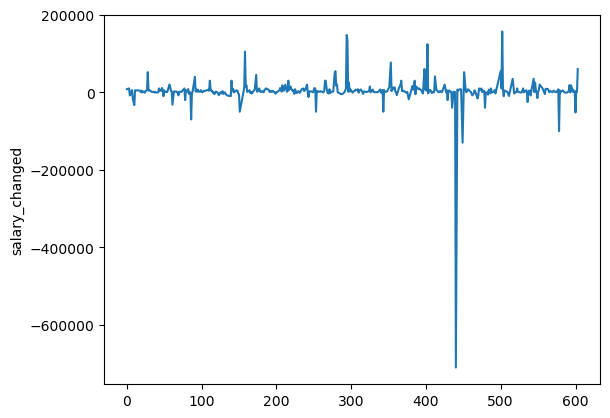

In [37]:
sns.lineplot(data = stat_salary['salary_changed'])

<Axes: xlabel='tier', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

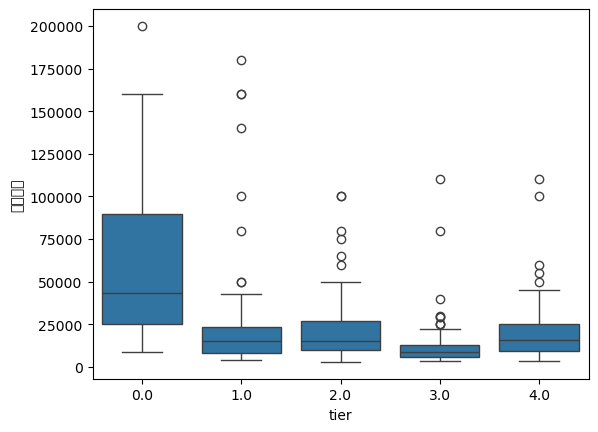

In [106]:
sns.boxplot(x = stat_salary['tier'], y = stat_salary['예측연봉'])

In [51]:
stat_salary_2020 = stat_salary.query('연도 == 2020')
stat_salary_2021 = stat_salary.query('연도 == 2021')
stat_salary_2022 = stat_salary.query('연도 == 2022')
stat_salary_2023 = stat_salary.query('연도 == 2023')

In [52]:
stat_salary_2020['mean_ERA'] = (6759 * 9) / 12789.667
stat_salary_2021['mean_ERA'] = (6243 * 9) / 12660
stat_salary_2022['mean_ERA'] = (5796 * 9) / 12584.667
stat_salary_2023['mean_ERA'] = (5905 * 9) / 12834.333

C:\Users\user\AppData\Local\Temp\ipykernel_17348\3865345467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_salary_2020['mean_ERA'] = (6759 * 9) / 12789.667
C:\Users\user\AppData\Local\Temp\ipykernel_17348\3865345467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_salary_2021['mean_ERA'] = (6243 * 9) / 12660
C:\Users\user\AppData\Local\Temp\ipykernel_17348\3865345467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [53]:
stat_salary_2023

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA
451,3,브랜든,두산,2.49,18,11,3,0,0,0.786,...,0,3,0,2023,23000.0,3.61,75000.0,2.0,52000.0,4.140846
452,4,알칸타라,두산,2.67,31,13,9,0,0,0.591,...,1,3,0,2023,50000.0,5.79,80000.0,0.0,30000.0,4.140846
453,5,곽빈,두산,2.90,23,12,7,0,0,0.632,...,0,4,1,2023,14000.0,4.36,21000.0,2.0,7000.0,4.140846
454,6,홍건희,두산,3.06,64,1,5,22,5,0.167,...,3,8,0,2023,30000.0,0.84,30000.0,1.0,0.0,4.140846
455,7,박치국,두산,3.59,62,5,3,2,11,0.625,...,1,2,0,2023,10500.0,0.50,13000.0,1.0,2500.0,4.140846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0,11,0,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,3,0,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,2,3,0,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0,8,2,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846


In [54]:
stat_salary_new = pd.concat([stat_salary_2020, stat_salary_2021, stat_salary_2022, stat_salary_2023])

In [55]:
stat_salary_new

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4,1,0,2020,8000.0,1.45,16000.0,4.0,8000.0,4.756261
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,0,2,1,2020,5900.0,3.46,16000.0,2.0,10100.0,4.756261
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,3,4,1,2020,27000.0,2.39,19000.0,2.0,-8000.0,4.756261
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,1,0,2020,21000.0,0.41,15600.0,3.0,-5400.0,4.756261
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,2,1,0,2020,2900.0,0.83,5500.0,1.0,2600.0,4.756261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0,11,0,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,3,0,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,2,3,0,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,0,8,2,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846


In [66]:
stat_salary_new['park_factor'] = 0

In [71]:
def get_parkfactor(df):
    if df['연도'] == 2020:
        if df['팀명'] == "두산":
            return 939
        elif df['팀명'] == "KT":
            return 1012
        elif df['팀명'] == "롯데":
            return 1043
        elif df['팀명'] == "키움":
            return 969
        elif df['팀명'] == "한화":
            return 978
        elif df['팀명'] == "NC":
            return 1037
        elif df['팀명'] == "LG":
            return 939
        elif df['팀명'] == "SSG":
            return 1029
        elif df['팀명'] == "삼성":
            return 1058
        else:
            return 1008
    if df['연도'] == 2021:
        if df['팀명'] == "두산":
            return 944
        elif df['팀명'] == "KT":
            return 1024
        elif df['팀명'] == "롯데":
            return 1050
        elif df['팀명'] == "키움":
            return 976
        elif df['팀명'] == "한화":
            return 980
        elif df['팀명'] == "NC":
            return 1026
        elif df['팀명'] == "LG":
            return 944
        elif df['팀명'] == "SSG":
            return 1027
        elif df['팀명'] == "삼성":
            return 1042
        else:
            return 999
    elif df['연도'] == 2022:
        if df['팀명'] == "두산":
            return 953
        elif df['팀명'] == "KT":
            return 1039
        elif df['팀명'] == "롯데":
            return 1034
        elif df['팀명'] == "키움":
            return 976
        elif df['팀명'] == "한화":
            return 995
        elif df['팀명'] == "NC":
            return 1013
        elif df['팀명'] == "LG":
            return 953
        elif df['팀명'] == "SSG":
            return 1034
        elif df['팀명'] == "삼성":
            return 1033
        else:
            return 989
    elif df['연도'] == 2023:
        if df['팀명'] == "두산":
            return 959
        elif df['팀명'] == "KT":
            return 1042
        elif df['팀명'] == "롯데":
            return 1032
        elif df['팀명'] == "키움":
            return 983
        elif df['팀명'] == "한화":
            return 1002
        elif df['팀명'] == "NC":
            return 1005
        elif df['팀명'] == "LG":
            return 966
        elif df['팀명'] == "SSG":
            return 1025
        elif df['팀명'] == "삼성":
            return 1027
        else:
            return 979
    return df


In [72]:
stat_salary_new['park_factor'] = stat_salary_new.apply(get_parkfactor, axis = 1)

In [73]:
stat_salary_new

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,WP,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA,park_factor
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,1,0,2020,8000.0,1.45,16000.0,4.0,8000.0,4.756261,939
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2,1,2020,5900.0,3.46,16000.0,2.0,10100.0,4.756261,939
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,4,1,2020,27000.0,2.39,19000.0,2.0,-8000.0,4.756261,939
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,0,2020,21000.0,0.41,15600.0,3.0,-5400.0,4.756261,939
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,1,0,2020,2900.0,0.83,5500.0,1.0,2600.0,4.756261,939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,11,0,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846,1025
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,3,0,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846,1025
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3,0,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846,1025
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,8,2,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846,1025


In [74]:
stat_salary_new.to_csv('pitcher_meanERA_parkfactor.csv', index = False)

In [94]:
stat_salary_new['ERA+'] = 100*(stat_salary_new['mean_ERA'] / stat_salary_new['ERA']) * (stat_salary_new['park_factor'] / 1000)

In [95]:
stat_salary_new

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA,park_factor,ERA+
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,0,2020,8000.0,1.45,16000.0,4.0,8000.0,4.756261,939,154.537353
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,1,2020,5900.0,3.46,16000.0,2.0,10100.0,4.756261,939,117.529724
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,2020,27000.0,2.39,19000.0,2.0,-8000.0,4.756261,939,96.252791
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,0,2020,21000.0,0.41,15600.0,3.0,-5400.0,4.756261,939,92.466449
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2020,2900.0,0.83,5500.0,1.0,2600.0,4.756261,939,91.331891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846,1025,81.154253
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846,1025,81.154253
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846,1025,75.522552
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,2,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846,1025,74.462587


c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print

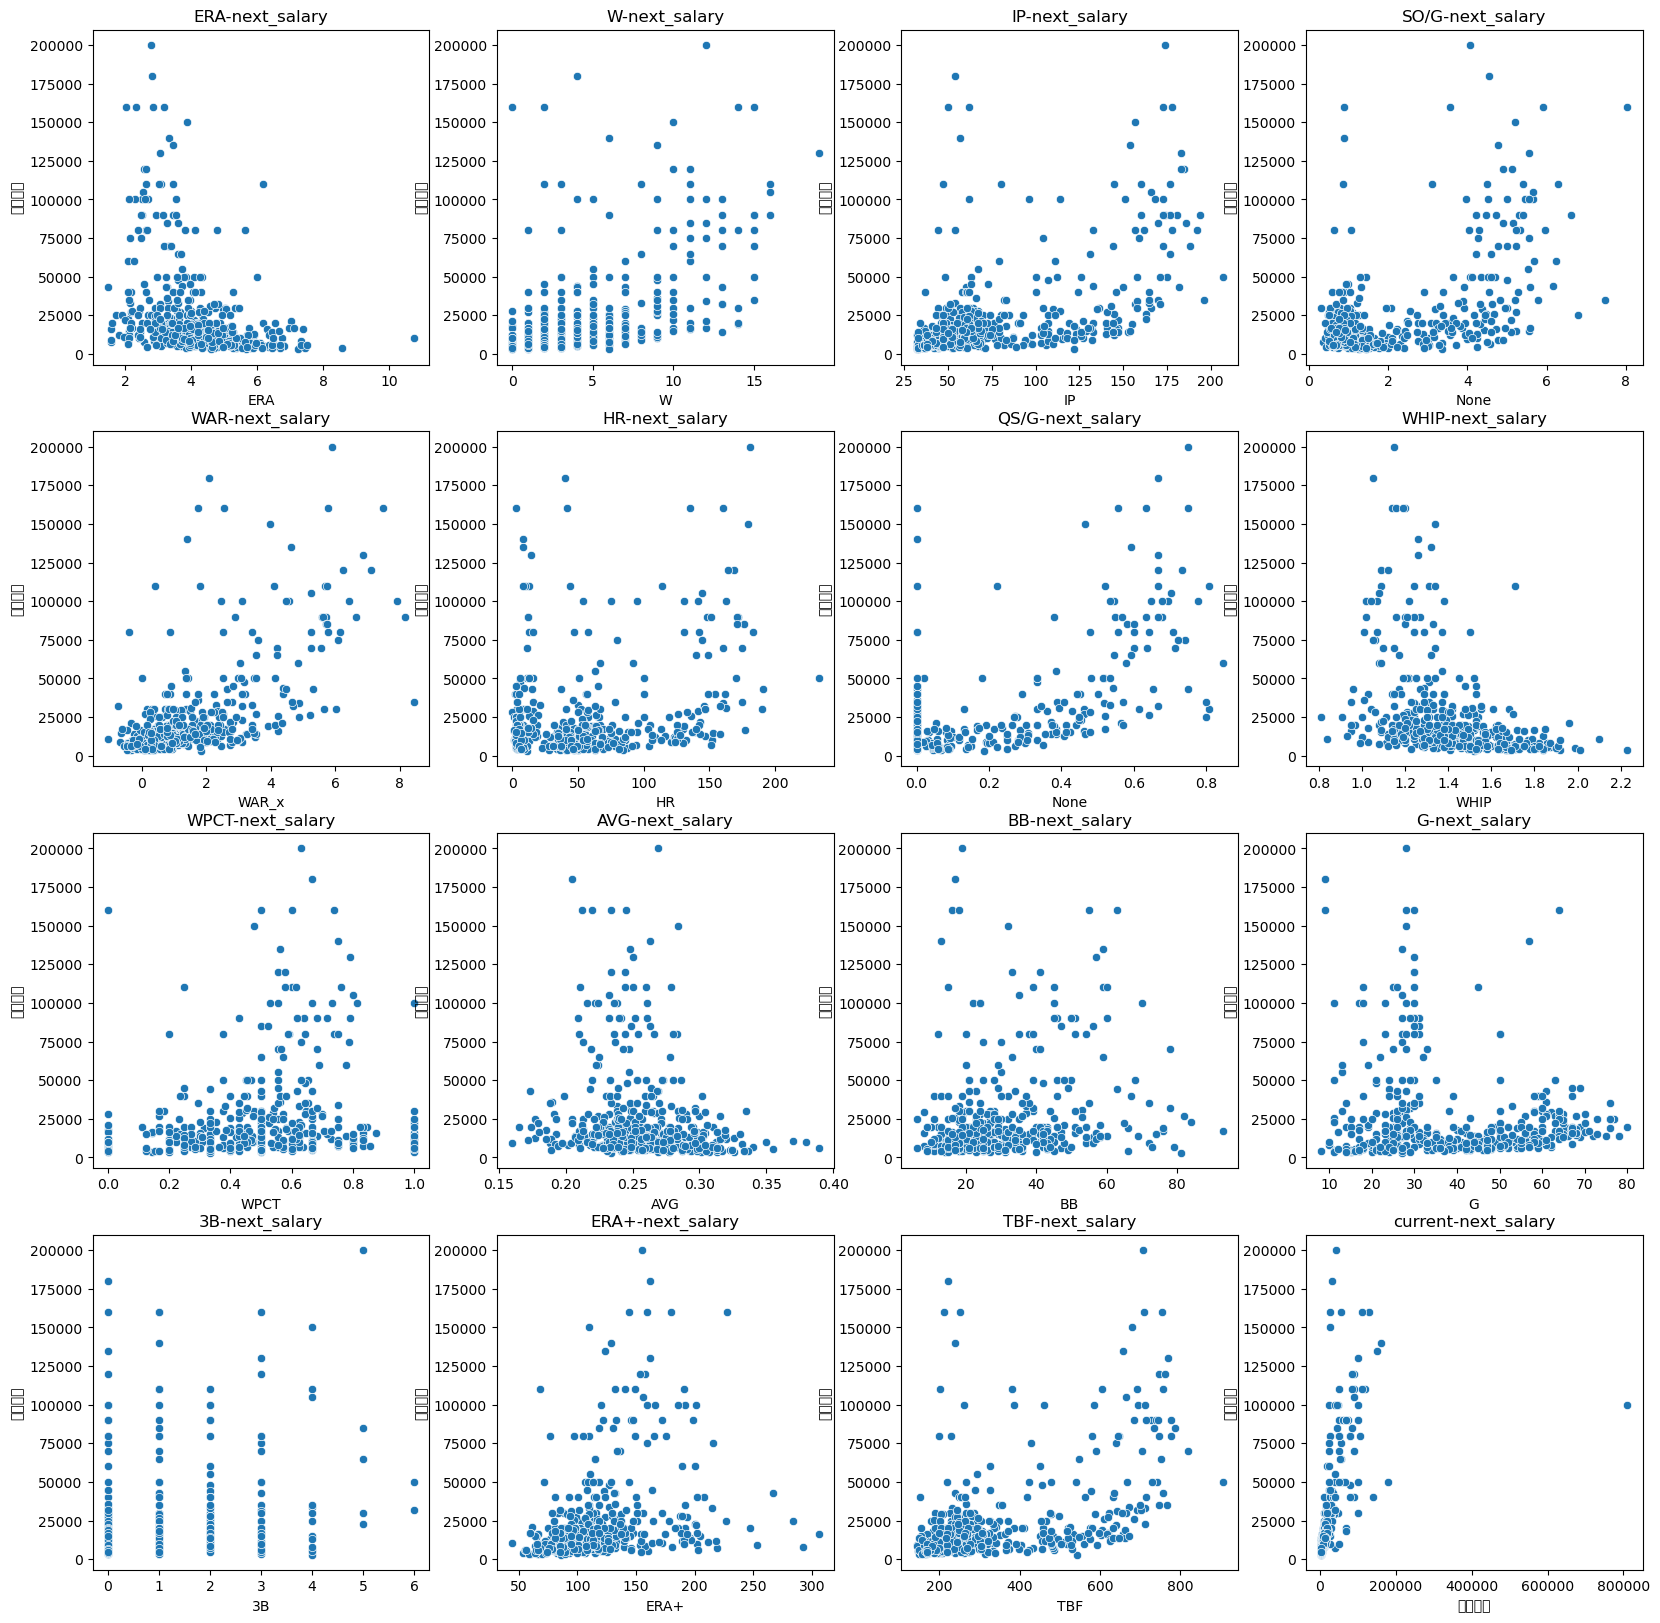

In [107]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
sns.scatterplot(x = stat_salary_new['ERA'], y = stat_salary_new['예측연봉'], ax = axes[0,0])
axes[0,0].set_title('ERA-next_salary')
sns.scatterplot(x = stat_salary_new['W'], y = stat_salary_new['예측연봉'], ax = axes[0,1])
axes[0,1].set_title('W-next_salary')
sns.scatterplot(x = stat_salary_new['IP'], y = stat_salary_new['예측연봉'], ax = axes[0,2])
axes[0,2].set_title('IP-next_salary')
sns.scatterplot(x = stat_salary_new['SO']/stat_salary_new['G'], y = stat_salary_new['예측연봉'], ax = axes[0,3])
axes[0,3].set_title('SO/G-next_salary')
sns.scatterplot(x = stat_salary_new['WAR_x'], y = stat_salary_new['예측연봉'], ax = axes[1,0])
axes[1,0].set_title('WAR-next_salary')
sns.scatterplot(x = stat_salary_new['HR'], y = stat_salary_new['예측연봉'], ax = axes[1,1])
axes[1, 1].set_title('HR-next_salary')
sns.scatterplot(x = stat_salary_new['QS']/stat_salary_new['G'], y = stat_salary_new['예측연봉'], ax = axes[1,2])
axes[1,2].set_title('QS/G-next_salary')
sns.scatterplot(x = stat_salary_new['WHIP'], y = stat_salary_new['예측연봉'], ax = axes[1, 3])
axes[1,3].set_title('WHIP-next_salary')
sns.scatterplot(x = stat_salary_new['WPCT'], y = stat_salary_new['예측연봉'], ax = axes[2,0])
axes[2,0].set_title('WPCT-next_salary')
sns.scatterplot(x = stat_salary_new['AVG'], y = stat_salary_new['예측연봉'], ax = axes[2,1])
axes[2,1].set_title('AVG-next_salary')
sns.scatterplot(x = stat_salary_new['BB'], y = stat_salary_new['예측연봉'], ax = axes[2, 2])
axes[2,2].set_title('BB-next_salary')
sns.scatterplot(x = stat_salary_new['G'], y = stat_salary_new['예측연봉'], ax = axes[2,3])
axes[2,3].set_title('G-next_salary')
sns.scatterplot(x = stat_salary_new['3B'], y = stat_salary_new['예측연봉'], ax = axes[3,0])
axes[3,0].set_title('3B-next_salary')
sns.scatterplot(x = stat_salary_new['ERA+'], y = stat_salary_new['예측연봉'], ax = axes[3,1])
axes[3,1].set_title('ERA+-next_salary')
sns.scatterplot(x = stat_salary_new['TBF'], y = stat_salary_new['예측연봉'], ax = axes[3,2])
axes[3,2].set_title('TBF-next_salary')
sns.scatterplot(x = stat_salary_new['현재연봉'], y = stat_salary_new['예측연봉'], ax = axes[3,3])
axes[3,3].set_title('current-next_salary')
plt.show()

In [97]:
stat_salary_new['ERA+'].describe()

count    444.000000
mean     116.828825
std       41.075894
min       44.556799
25%       89.201339
50%      108.334945
75%      134.522194
max      305.370161
Name: ERA+, dtype: float64

In [105]:
stat_salary_new['ERA+'].max()

305.37016133095847

In [108]:
stat_salary_new.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'salary_changed', 'mean_ERA',
       'park_factor', 'ERA+'],
      dtype='object')

In [109]:
stat_new_corr = stat_salary_new[['ERA', 'W', 'L', 'IP', 'SO', 'WHIP', 'CG', 'SHO', 'QS', 'BSV', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'salary_changed', 'ERA+']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from curren

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

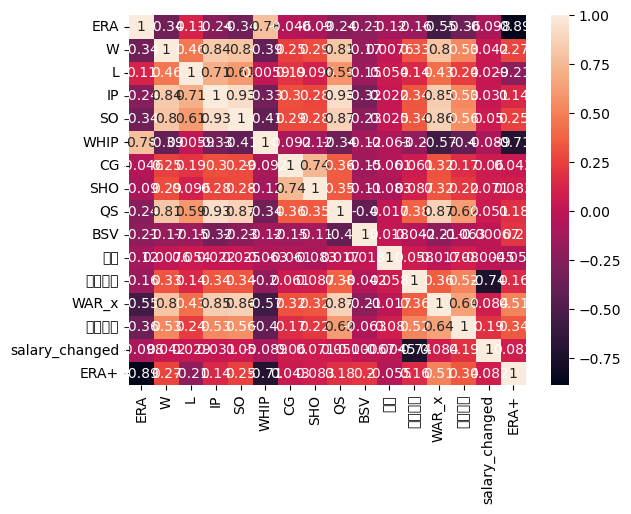

In [110]:
sns.heatmap(stat_new_corr, annot = True)

In [111]:
stat_salary_new

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,BK,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA,park_factor,ERA+
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,0,2020,8000.0,1.45,16000.0,4.0,8000.0,4.756261,939,154.537353
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,1,2020,5900.0,3.46,16000.0,2.0,10100.0,4.756261,939,117.529724
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,2020,27000.0,2.39,19000.0,2.0,-8000.0,4.756261,939,96.252791
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,0,2020,21000.0,0.41,15600.0,3.0,-5400.0,4.756261,939,92.466449
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2020,2900.0,0.83,5500.0,1.0,2600.0,4.756261,939,91.331891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,0,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846,1025,81.154253
600,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,0,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846,1025,81.154253
601,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,0,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846,1025,75.522552
602,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,2,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846,1025,74.462587


In [112]:
stat_salary_new.to_csv('stat.csv', index = False)

In [2]:
st = pd.read_csv('./stat.csv')

In [17]:
st = st.rename(columns = {'ERA+' : 'Adj_ERA'})

In [18]:
st

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,연도,현재연봉,WAR_x,예측연봉,tier,salary_changed,mean_ERA,park_factor,Adj_ERA,연차
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2020,8000.0,1.45,16000.0,4.0,8000.0,4.756261,939,154.537353,4
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2020,5900.0,3.46,16000.0,2.0,10100.0,4.756261,939,117.529724,4
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,2020,27000.0,2.39,19000.0,2.0,-8000.0,4.756261,939,96.252791,5
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,2020,21000.0,0.41,15600.0,3.0,-5400.0,4.756261,939,92.466449,9
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,2020,2900.0,0.83,5500.0,1.0,2600.0,4.756261,939,91.331891,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2023,14000.0,1.64,14000.0,0.0,0.0,4.140846,1025,81.154253,4
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,2023,70000.0,0.78,18000.0,2.0,-52000.0,4.140846,1025,81.154253,12
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,2023,3000.0,-0.15,7400.0,1.0,4400.0,4.140846,1025,75.522552,1
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,2023,3000.0,0.08,4500.0,1.0,1500.0,4.140846,1025,74.462587,1


In [19]:
st.isna().sum()

순위                0
선수명               0
팀명                0
ERA               0
G                 0
W                 0
L                 0
SV                0
HLD               0
WPCT              0
IP                0
H                 0
HR                0
BB                0
HBP               0
SO                0
R                 0
ER                0
WHIP              0
CG                0
SHO               0
QS                0
BSV               0
TBF               0
NP                0
AVG               0
2B                0
3B                0
SAC               0
SF                0
IBB               0
WP                0
BK                0
연도                0
현재연봉              0
WAR_x             0
예측연봉              0
tier              0
salary_changed    0
mean_ERA          0
park_factor       0
Adj_ERA           0
연차                0
dtype: int64

In [20]:
import matplotlib.pyplot as plt

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_fi

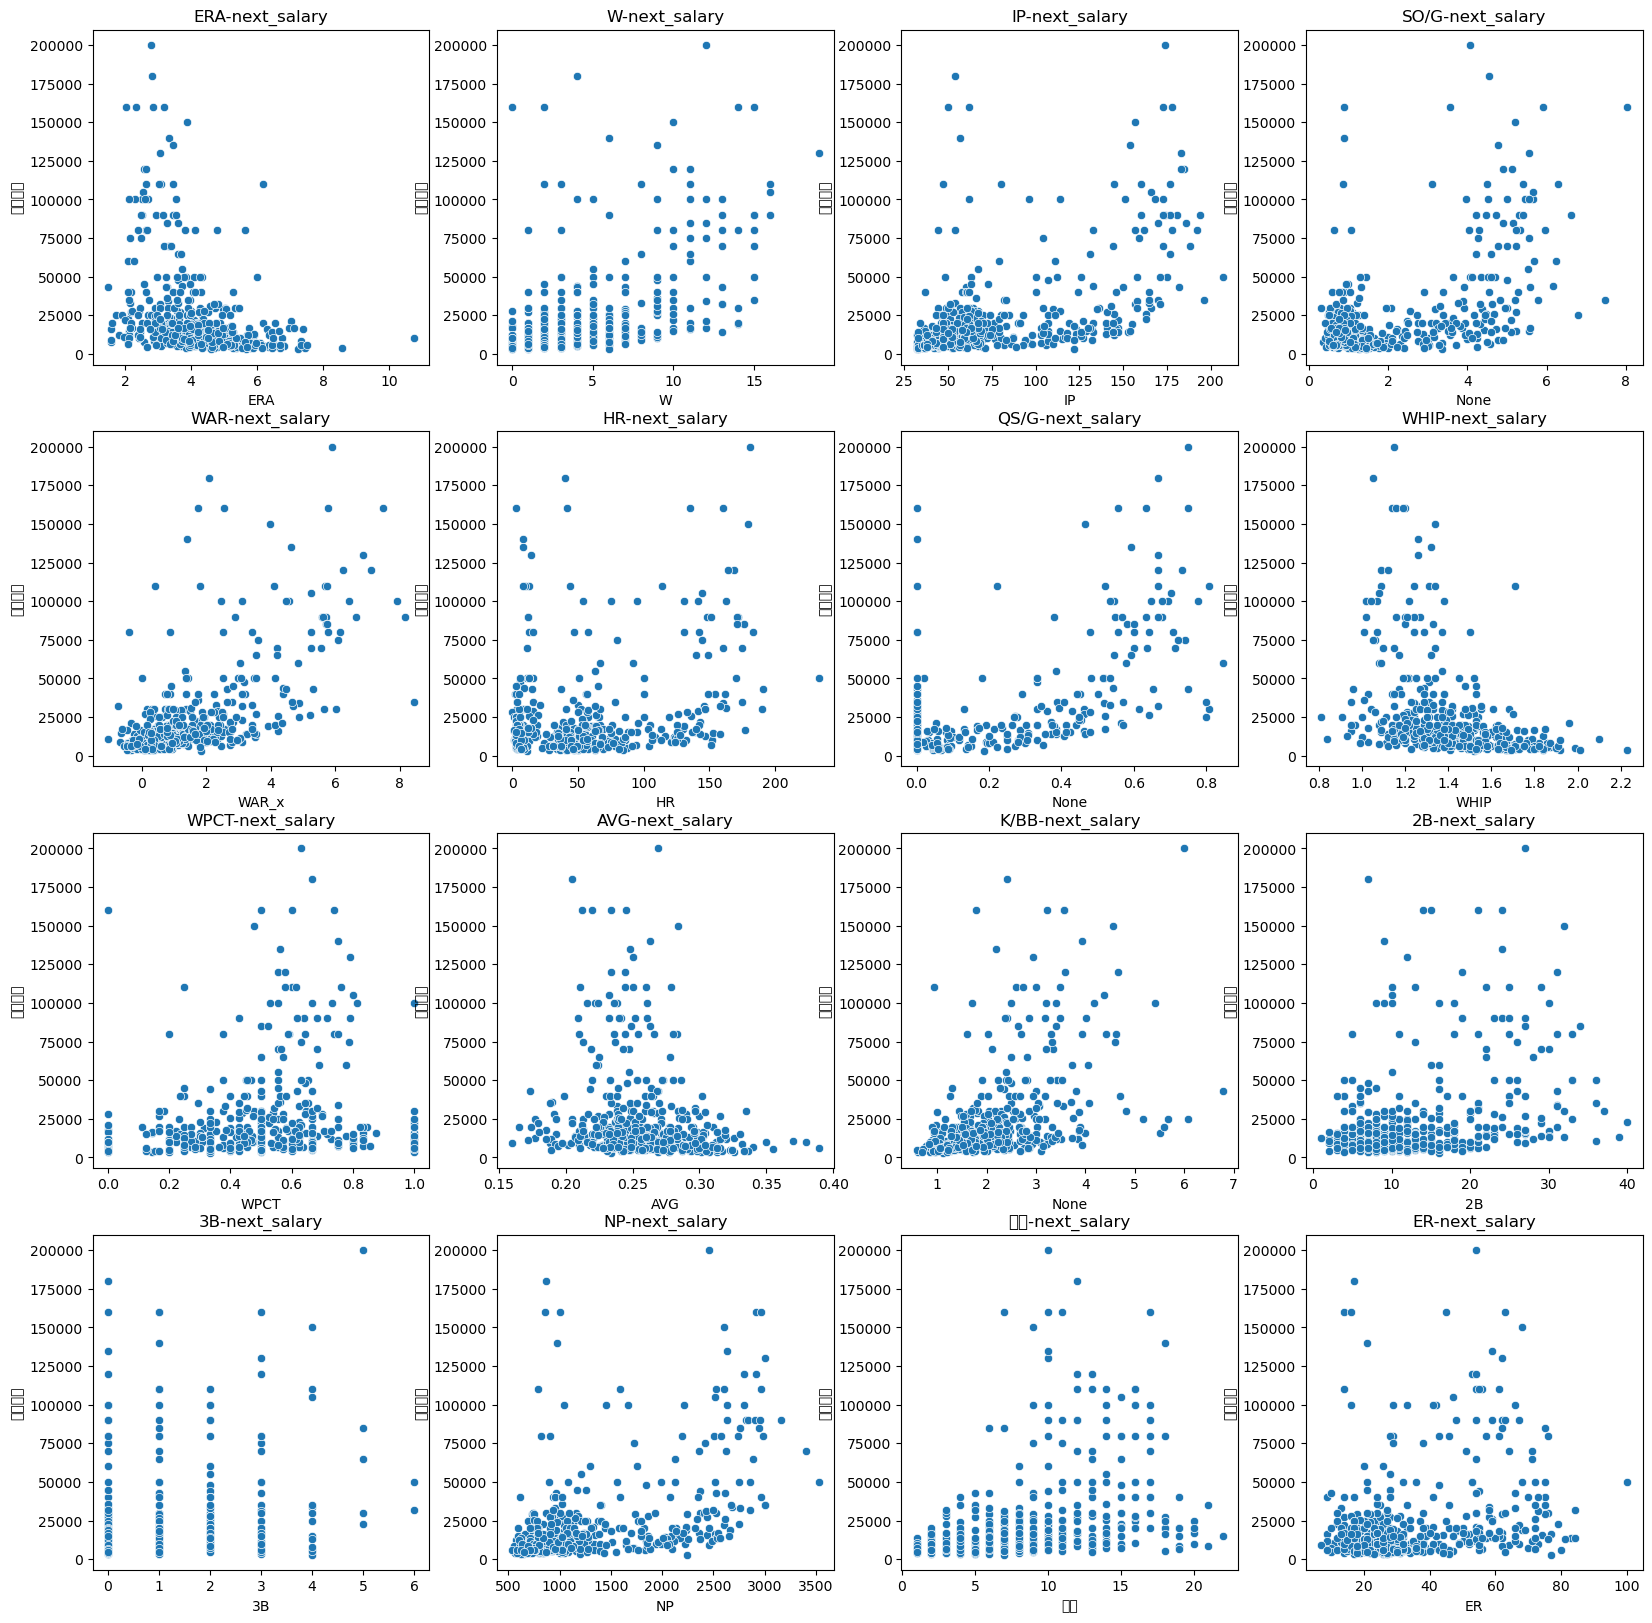

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
sns.scatterplot(x = st['ERA'], y = st['예측연봉'], ax = axes[0,0])
axes[0,0].set_title('ERA-next_salary')
sns.scatterplot(x = st['W'], y = st['예측연봉'], ax = axes[0,1])
axes[0,1].set_title('W-next_salary')
sns.scatterplot(x = st['IP'], y = st['예측연봉'], ax = axes[0,2])
axes[0,2].set_title('IP-next_salary')
sns.scatterplot(x = st['SO']/st['G'], y = st['예측연봉'], ax = axes[0,3])
axes[0,3].set_title('SO/G-next_salary')
sns.scatterplot(x = st['WAR_x'], y = st['예측연봉'], ax = axes[1,0])
axes[1,0].set_title('WAR-next_salary')
sns.scatterplot(x = st['HR'], y = st['예측연봉'], ax = axes[1,1])
axes[1, 1].set_title('HR-next_salary')
sns.scatterplot(x = st['QS']/st['G'], y = st['예측연봉'], ax = axes[1,2])
axes[1,2].set_title('QS/G-next_salary')
sns.scatterplot(x = st['WHIP'], y = st['예측연봉'], ax = axes[1, 3])
axes[1,3].set_title('WHIP-next_salary')
sns.scatterplot(x = st['WPCT'], y = st['예측연봉'], ax = axes[2,0])
axes[2,0].set_title('WPCT-next_salary')
sns.scatterplot(x = st['AVG'], y = st['예측연봉'], ax = axes[2,1])
axes[2,1].set_title('AVG-next_salary')
sns.scatterplot(x = st['SO']/st['BB'], y = st['예측연봉'], ax = axes[2, 2])
axes[2,2].set_title('K/BB-next_salary')
sns.scatterplot(x = st['2B'], y = st['예측연봉'], ax = axes[2,3])
axes[2,3].set_title('2B-next_salary')
sns.scatterplot(x = st['3B'], y = st['예측연봉'], ax = axes[3,0])
axes[3,0].set_title('3B-next_salary')
sns.scatterplot(x = st['NP'], y = st['예측연봉'], ax = axes[3,1])
axes[3,1].set_title('NP-next_salary')
sns.scatterplot(x = st['연차'], y = st['예측연봉'], ax = axes[3,2])
axes[3,2].set_title('연차-next_salary')
sns.scatterplot(x = st['ER'], y = st['예측연봉'], ax = axes[3,3])
axes[3,3].set_title('ER-next_salary')
plt.show()

In [22]:
st.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'salary_changed', 'mean_ERA',
       'park_factor', 'Adj_ERA', '연차'],
      dtype='object')

In [34]:
st['QS_G'] = st['QS'] / st['G']
st['SO_G'] = st['SO'] / st['G']
st['K_BB'] = st['SO'] / st['BB']

In [39]:
def get_cfip(df):
    if df['연도'] == 2020:
        return 3.995
    elif df['연도'] == 2021:
        return 3.767
    elif df['연도'] == 2022:
        return 3.784
    else:
        return 3.849

In [40]:
st['cFIP'] = 0
st['cFIP'] = st.apply(get_cfip, axis = 1)

In [55]:
st['pFIP'] = ((13 * st['HR'] + 3 * (st['BB'] + st['HBP']) -2 * st['SO']) / st['IP']) + st['cFIP']
st['erapfip'] = st['pFIP'] - st['ERA']
st['QS_9'] = (st['QS']/st['IP']) * 9

In [69]:
st['WAR_won'] = (st['WAR_x'] / st['현재연봉']) * 10000

In [70]:
st

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,SO/G,K/BB,QS_G,SO_G,K_BB,cFIP,pFIP,erapfip,QS_9,WAR_won
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,1.047619,1.941176,0.000000,1.047619,1.941176,3.995,15.685141,12.795141,0.000000,1.812500
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,2.238095,2.685714,0.095238,2.238095,2.685714,3.995,5.076301,1.276301,0.292683,5.864407
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,2.023810,1.287879,0.166667,2.023810,1.287879,3.995,5.207121,0.567121,0.477273,0.885185
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,0.476190,1.538462,0.000000,0.476190,1.538462,3.995,5.312073,0.482073,0.000000,0.195238
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,1.862069,2.454545,0.000000,1.862069,2.454545,3.995,14.900660,10.010660,0.000000,2.862069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,3.142857,1.275362,0.250000,3.142857,1.275362,3.849,18.515667,13.285667,0.437500,1.171429
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1.300000,1.857143,0.080000,1.300000,1.857143,3.849,5.268048,0.038048,0.342857,0.111429
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1.040000,1.793103,0.000000,1.040000,1.793103,3.849,18.884088,13.264088,0.000000,-0.500000
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,2.235294,1.225806,0.058824,2.235294,1.225806,3.849,17.061766,11.361766,0.191489,0.266667


In [72]:
st_corr = st[['ERA', 'W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'pFIP','SO_G', 'QS_G', 'K_BB', 'WAR_won','예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarnin

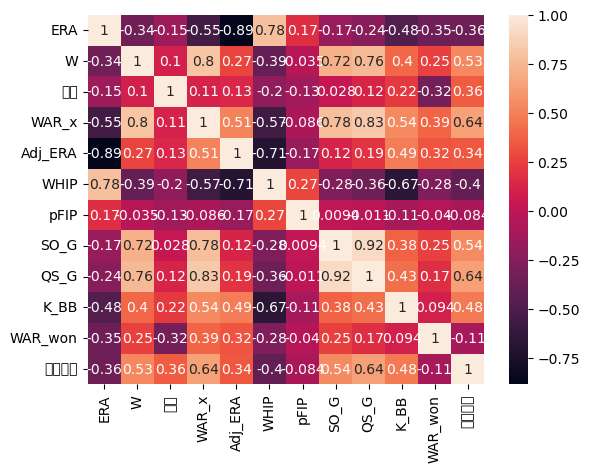

In [73]:
sns.heatmap(st_corr, annot = True)

In [81]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
model = sm.OLS(st['예측연봉'], st[['ERA', 'W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'WPCT','SO_G', 'pFIP','QS_G', 'WAR_won', 'K_BB','현재연봉']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   예측연봉   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              118.7
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                   2.70e-133
Time:                        16:10:33   Log-Likelihood:                         -4996.9
No. Observations:                 444   AIC:                                  1.002e+04
Df Residuals:                     431   BIC:                                  1.007e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA        -2761.0306   1604.307     -1.721      0.086   -5914.268     392.207
W              2.6176    500.898      0.005      0.996    -981.888     987.124
연차           672.3129    209.490      3.209      0.001     260.563    1084.063
WAR_x       6136.7658   1569.578      3.910      0.000    3051.786    9221.746
Adj_ERA       46.5603     39.781      1.170      0.242     -31.629     124.749
WHIP        8171.8961   6522.636      1.253      0.211   -4648.235     2.1e+04
WPCT       -5352.3404   4928.149     -1.086      0.278    -1.5e+04    4333.855
SO_G        -404.9226   1441.187     -0.281      0.779   -3237.552    2427.707
pFIP         -82.7807    159.128     -0.520      0.603    -395.544     229.983
QS_G        3.864e+04   1.22e+04      3.166      0.002    1.46e+04    6.26e+04
WAR_won    -4741.3115    661.624     -7.166      0.000   -6041.722   -3440.901
K_BB        2998.9318   1268.999      2.363      0.019     504.736    5493.128
현재연봉           0.1227      0.023      5.316      0.000       0.077       0.168
==============================================================================
Omnibus:                      298.219   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4678.940
Skew:                           2.653   Prob(JB):                         0.00
Kurtosis:                      17.992   Cond. No.                     6.92e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
y, X = dmatrices('예측연봉 ~ ERA + W + 연차 + WAR_x + Adj_ERA + WHIP + SO_G + QS_G + K_BB + WPCT + pFIP + WAR_won + 현재연봉', data = st, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF_Factor,features
0,279.624005,Intercept
1,6.672790,ERA
2,4.489682,W
3,1.344974,연차
4,9.252620,WAR_x
5,5.580154,Adj_ERA
6,3.950023,WHIP
7,7.541460,SO_G
8,9.849075,QS_G
9,2.152943,K_BB


In [89]:
df = st[['ERA', 'W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'SO_G', 'pFIP','QS_G', 'WAR_won', 'WPCT','K_BB','현재연봉', '예측연봉']]
df

,ERA,W,연차,WAR_x,Adj_ERA,WHIP,SO_G,pFIP,QS_G,WAR_won,WPCT,K_BB,현재연봉,예측연봉
0,2.89,4,4,1.45,154.537353,1.38,1.047619,15.685141,0.000000,1.812500,0.500,1.941176,8000.0,16000.0
1,3.80,10,4,3.46,117.529724,1.37,2.238095,5.076301,0.095238,5.864407,0.833,2.685714,5900.0,16000.0
2,4.64,5,5,2.39,96.252791,1.62,2.023810,5.207121,0.166667,0.885185,0.313,1.287879,27000.0,19000.0
3,4.83,1,9,0.41,92.466449,1.56,0.476190,5.312073,0.000000,0.195238,1.000,1.538462,21000.0,15600.0
4,4.89,1,3,0.83,91.331891,1.29,1.862069,14.900660,0.000000,2.862069,0.333,2.454545,2900.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,5.23,8,4,1.64,81.154253,1.57,3.142857,18.515667,0.250000,1.171429,0.444,1.275362,14000.0,14000.0
440,5.23,5,12,0.78,81.154253,1.65,1.300000,5.268048,0.080000,0.111429,0.385,1.857143,70000.0,18000.0
441,5.62,6,1,-0.15,75.522552,1.66,1.040000,18.884088,0.000000,-0.500000,0.857,1.793103,3000.0,7400.0
442,5.70,3,1,0.08,74.462587,1.63,2.235294,17.061766,0.058824,0.266667,0.500,1.225806,3000.0,4500.0


In [90]:
from regression_model import regression_model

rm = regression_model(df)

multi_lr = rm.modeling()

모델 평가 점수 :  0.7908852768627638


In [80]:
st.to_csv('stats_fin.csv', index = False)